In [1]:
from mewpy.simulation import solvers
from mewpy.simulation import set_default_solver
set_default_solver('glpk')

In [2]:
solvers

['glpk']

# load unconstrained human1 model

In [3]:
from cobra.io.sbml import read_sbml_model
model = read_sbml_model('Human-GEM-annotated.xml')
model

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


Name,HumanGEM
Memory address,0x01284bcee0
Number of metabolites,8400
Number of reactions,13096
Number of groups,143
Objective expression,1.0*biomass_human - 1.0*biomass_human_reverse_fb2f2
Compartments,"Cytosol, Extracellular, Lysosome, Endoplasmic reticulum, Mitochondria, Peroxisome, Golgi apparatus, Nucleus, Inner mitochondria"


In [4]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
m00350s,EX_13_cis_retn[e],0.01938,20,0.00%
m01417s,EX_1a25dhvitd3[e],0.003867,27,0.00%
m00674s,EX_2pg[e],0.3261,3,0.00%
m01231s,EX_CE1617[e],0.003867,20,0.00%
m02318s,EX_CE5786[e],38.17,56,0.74%
m02479s,EX_HC00900[e],867.9,4,1.20%
m02965s,EX_HC02192[e],246.1,26,2.22%
m02000s,EX_HC02193[e],1000,26,9.00%
m02871s,EX_ahcys[e],1000,14,4.85%
asntyrthr_s,EX_asntyrthr[e],28.59,17,0.17%


# load and apply media conditions

In [5]:
#this was determined in a previous notebook. All specified CCLE media conditions were added, with custom high glucose level.
#all non-specified reactions initially switched off, then if this dropped growth to zro, reaction was reopened.
import pandas as pd
media_conditions = pd.read_csv('/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP_PhD_UoM/Datasets/Alternative datasets/CCLE main spreadsheets/high_gluc_dict2.csv')
media = {}
for n in range(len(media_conditions['reaction'])):
    media[media_conditions.iloc[n,1]] = (media_conditions.iloc[n,2], media_conditions.iloc[n,3])
#set glucose concentration as high
media['HMR_9034'] = (-4.5,1000)
media

{'HMR_7108': (0.0, 1000),
 'HMR_7110': (0.0, 1000),
 'HMR_7112': (0.0, 1000),
 'HMR_7114': (0.0, 1000),
 'HMR_7116': (0.0, 1000),
 'HMR_7118': (0.0, 1000),
 'HMR_7120': (0.0, 1000),
 'HMR_7122': (0.0, 1000),
 'HMR_7124': (0.0, 1000),
 'HMR_7126': (0.0, 1000),
 'HMR_9023': (0.0, 1000),
 'HMR_9024': (0.0, 1000),
 'HMR_9032': (0.0, 1000),
 'HMR_9808': (0.0, 1000),
 'HMR_9809': (0.0, 1000),
 'HMR_9810': (0.0, 1000),
 'HMR_9811': (0.0, 1000),
 'HMR_9812': (0.0, 1000),
 'HMR_9813': (0.0, 1000),
 'HMR_9814': (0.0, 1000),
 'HMR_9815': (0.0, 1000),
 'HMR_9816': (0.0, 1000),
 'HMR_9033': (0.0, 1000),
 'HMR_9034': (-4.5, 1000),
 'HMR_9035': (-4.2e-05, 1000),
 'HMR_9036': (0.0, 1000),
 'HMR_9037': (0.0, 1000),
 'HMR_9038': (0.0, 1000),
 'HMR_9039': (-0.05447, 1000),
 'HMR_9040': (-0.05905, 1000),
 'HMR_9041': (0.0, 1000),
 'HMR_9042': (-0.01724, 1000),
 'HMR_9043': (-0.03548, 1000),
 'HMR_9044': (0.0, 1000),
 'HMR_9045': (-0.00902, 1000),
 'HMR_9046': (-0.05285, 1000),
 'HMR_9047': (0.0, 1000),
 '

In [6]:
for k, v in media.items():
    if v != (0,1000):
        if v != (-1000,1000):
            print(k)
            print(model.reactions.get_by_id(k).name)
            print(model.reactions.get_by_id(k).bounds)
            print('\n')

HMR_9034
-1.0 glucose <--> 
(-1000.0, 1000.0)


HMR_9035
-1.0 linoleate <--> 
(-1000.0, 1000.0)


HMR_9039
-1.0 isoleucine <--> 
(-1000.0, 1000.0)


HMR_9040
-1.0 leucine <--> 
(-1000.0, 1000.0)


HMR_9042
-1.0 methionine <--> 
(-1000.0, 1000.0)


HMR_9043
-1.0 phenylalanine <--> 
(-1000.0, 1000.0)


HMR_9045
-1.0 tryptophan <--> 
(-1000.0, 1000.0)


HMR_9046
-1.0 valine <--> 
(-1000.0, 1000.0)


HMR_9061
-1.0 alanine <--> 
(-1000.0, 1000.0)


HMR_9063
-1.0 glutamine <--> 
(-1000.0, 1000.0)


HMR_9067
-1.0 glycine <--> 
(-1000.0, 1000.0)


HMR_9068
-1.0 proline <--> 
(-1000.0, 1000.0)


HMR_9069
-1.0 serine <--> 
(-1000.0, 1000.0)


HMR_9070
-1.0 aspartate <--> 
(-1000.0, 1000.0)


HMR_9071
-1.0 glutamate <--> 
(-1000.0, 1000.0)


HMR_9109
-1.0 biotin <--> 
(-1000.0, 1000.0)


HMR_9143
-1.0 riboflavin <--> 
(-1000.0, 1000.0)


HMR_9146
-1.0 folate <--> 
(-1000.0, 1000.0)


HMR_9167
-1.0 lipoic acid <--> 
(-1000.0, 1000.0)


HMR_9358
-1.0 hypoxanthine <--> 
(-1000.0, 1000.0)


HMR_9361


In [7]:
from mewpy.simulation import get_simulator
media_only_simulation = get_simulator(model, envcond = media)
media_only_result = media_only_simulation.simulate()
print(media_only_result)

objective: 0.07246376811594203
Status: OPTIMAL
Constraints: OrderedDict([('HMR_7108', (0.0, 1000)), ('HMR_7110', (0.0, 1000)), ('HMR_7112', (0.0, 1000)), ('HMR_7114', (0.0, 1000)), ('HMR_7116', (0.0, 1000)), ('HMR_7118', (0.0, 1000)), ('HMR_7120', (0.0, 1000)), ('HMR_7122', (0.0, 1000)), ('HMR_7124', (0.0, 1000)), ('HMR_7126', (0.0, 1000)), ('HMR_9023', (0.0, 1000)), ('HMR_9024', (0.0, 1000)), ('HMR_9032', (0.0, 1000)), ('HMR_9808', (0.0, 1000)), ('HMR_9809', (0.0, 1000)), ('HMR_9810', (0.0, 1000)), ('HMR_9811', (0.0, 1000)), ('HMR_9812', (0.0, 1000)), ('HMR_9813', (0.0, 1000)), ('HMR_9814', (0.0, 1000)), ('HMR_9815', (0.0, 1000)), ('HMR_9816', (0.0, 1000)), ('HMR_9033', (0.0, 1000)), ('HMR_9034', (-4.5, 1000)), ('HMR_9035', (-4.2e-05, 1000)), ('HMR_9036', (0.0, 1000)), ('HMR_9037', (0.0, 1000)), ('HMR_9038', (0.0, 1000)), ('HMR_9039', (-0.05447, 1000)), ('HMR_9040', (-0.05905, 1000)), ('HMR_9041', (0.0, 1000)), ('HMR_9042', (-0.01724, 1000)), ('HMR_9043', (-0.03548, 1000)), ('HMR_9044

In [8]:
media_only_summary = model.summary()
media_only_summary

Metabolite,Reaction,Flux,C-Number,C-Flux
m01359s,EX_HC00009[e],0.03767,1569,6.58%
m02837s,EX_M02837[e],4.194E-05,36,0.00%
m02122s,EX_hxcoa[e],1.14,27,3.43%
nfdoh_s,EX_nfdoh[e],32.9,16,58.62%
m02328s,HMR_10027,6.878,31,23.74%
m01965s,HMR_9034,4.5,6,3.01%
m02184s,HMR_9039,0.05447,6,0.04%
m02360s,HMR_9040,0.05905,6,0.04%
m02471s,HMR_9042,0.01724,5,0.01%
m02724s,HMR_9043,0.03548,9,0.04%


In [9]:
media_only_result.find(['biomass_human'])

,Flux rate
Reaction ID,
biomass_human,0.072464


## essential reactions and genes, media conditions only

In [10]:
%store -r media_only_essential_reactions
%store -r media_only_essential_genes

# load and create expression dictionary for transcriptomics data (normalised, CCLE)

In [11]:
t = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP_PhD_UoM/Datasets/Alternative datasets/CCLE main spreadsheets/ccle_tomics.csv', index_col = [0])

gene_exp = t.iloc[2,:]
g_list = []
for k in gene_exp.keys():
    g_list.append(k)

g_ensembl = []
for n in range(len(g_list)):
    if 'ENS' not in (g_list[n].split())[0]:
        g_ensembl.append((g_list[n].split())[1])
    if 'ENS' in (g_list[n].split())[0]:
        g_ensembl.append((g_list[n].split())[0])

vs = []
for v in gene_exp:
    vs.append(v)
    
gene_exp_dict = {}
for n in range(len(g_ensembl)):
    gene_exp_dict[g_ensembl[n]] = vs[n]
gene_exp_dict

{'ENSG00000000003': 2.776103988,
 'ENSG00000000005': 0.070389328,
 'ENSG00000000419': 6.323009711,
 'ENSG00000000457': 1.989139007,
 'ENSG00000000460': 2.541019153,
 'ENSG00000000938': 0.201633861,
 'ENSG00000000971': 1.735522177,
 'ENSG00000001036': 5.317593505,
 'ENSG00000001084': 5.486070744,
 'ENSG00000001167': 3.949534933,
 'ENSG00000001460': 1.815575429,
 'ENSG00000001461': 2.778208576,
 'ENSG00000001497': 4.629939409,
 'ENSG00000001561': 0.910732662,
 'ENSG00000001617': 3.791814071,
 'ENSG00000001626': 0.150559677,
 'ENSG00000001629': 4.894817763,
 'ENSG00000001630': 5.294988268,
 'ENSG00000001631': 4.012568674,
 'ENSG00000002016': 3.09592442,
 'ENSG00000002079': 0.475084883,
 'ENSG00000002330': 5.126394738,
 'ENSG00000002549': 5.917431755,
 'ENSG00000002586': 7.205060111,
 'ENSG00000002587': 0.070389328,
 'ENSG00000002726': 0.042644337,
 'ENSG00000002745': 0.084064265,
 'ENSG00000002746': 0.22650853,
 'ENSG00000002822': 3.129283017,
 'ENSG00000002834': 6.520736527,
 'ENSG000000

# sort model reactions accoring to their reaction rules

In [12]:
ANDs = []
ORs = []
ANDORs = []
one_gene = []
no_gene = []

for r in model.reactions:
    if 'and' in r.gene_reaction_rule and 'or' not in r.gene_reaction_rule:
        ANDs.append(r.id)
    if 'and' in r.gene_reaction_rule and 'or' in r.gene_reaction_rule:
        ANDORs.append(r.id)
    if 'or' in r.gene_reaction_rule and 'and' not in r.gene_reaction_rule:
        ORs.append(r.id)
    if len(r.gene_reaction_rule) == 0:
        no_gene.append(r.id)
    if len(r.gene_reaction_rule) != 0:
        if 'or' in r.gene_reaction_rule:
            continue
        elif 'and' in r.gene_reaction_rule:
            continue
        else:
            one_gene.append(r.id)

print('AND rules: ', len(ANDs))
print('ANDOR rules: ', len(ANDORs))
print('OR rules: ', len(ORs))
print('ONE GENE rules: ', len(one_gene))
print('NO GENE rules: ', len(no_gene))
print('Proportion of model not annotated: ', len(no_gene)/len(model.reactions)*100, '%')
print('Proportion of model which IS annotated: ', 100-(len(no_gene)/len(model.reactions)*100), '%')
print('Total Reactions = ', len(model.reactions))
print(len(ORs)+len(ANDs)+len(ANDORs)+len(one_gene)+len(no_gene))

AND rules:  653
ANDOR rules:  129
OR rules:  3972
ONE GENE rules:  3282
NO GENE rules:  5060
Proportion of model not annotated:  38.63775198533904 %
Proportion of model which IS annotated:  61.36224801466096 %
Total Reactions =  13096
13096


# integrate transcriptomics into one-gene rules

# one-gene, forward direction

In [13]:
one_gene_forward = []
one_gene_reversible = []
for r in one_gene:
    if model.reactions.get_by_id(r).reversibility == True:
        one_gene_reversible.append(r)
    else:
        one_gene_forward.append(r)
print('number of reversible, one gene reactions =', len(one_gene_reversible))
print('number of forward, one gene reactions =', len(one_gene_forward))

number of reversible, one gene reactions = 1074
number of forward, one gene reactions = 2208


In [14]:
one_gene_constrained_reactions = {}
for r in one_gene_forward:
    if r not in media.keys():
        if r not in media_only_essential_reactions:
            if model.reactions.get_by_id(r).gene_reaction_rule not in media_only_essential_genes:
                if model.reactions.get_by_id(r).gene_reaction_rule in gene_exp_dict.keys(): # or set in excess in dict but essential genes row should mean we dont search these core reactions
                    if gene_exp_dict[model.reactions.get_by_id(r).gene_reaction_rule] != (0,0): #don't allow any bounds to be zero
                        model.reactions.get_by_id(r).bounds = (0,(gene_exp_dict[model.reactions.get_by_id(r).gene_reaction_rule]))
                        solution = model.optimize()
                        if solution.fluxes['biomass_human'] ==0:
                            print(r, ':', 'constrained bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                            model.reactions.get_by_id(r).bounds = (0,1000)
                            solution = model.optimize()
                            print(r, ':', 're-opened bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                            one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds
                        if solution.fluxes['biomass_human'] !=0:
                            print(r, ':', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                            one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds

HMR_3907 : (0, 7.708325207) 0.07246376811594203
HMR_4097 : (0, 5.679198571) 0.07246376811594203
HMR_4108 : (0, 5.679198571) 0.07246376811594203
HMR_4133 : (0, 5.679198571) 0.07246376811594203
HMR_4360 : (0, 2.516015147) 0.07246376811594203
HMR_4372 : (0, 4.394376945) 0.07246376811594203
HMR_7747 : (0, 4.981396032) 0.07246376811594203
HMR_8360 : (0, 4.278728213) 0.07246376811594203
HMR_8757 : (0, 2.189033824) 0.07246376811594203
HMR_5397 : (0, 5.468257468) 0.07246376811594203
HMR_5399 : (0, 2.272023189) 0.07246376811594203
HMR_5400 : (0, 2.272023189) 0.07246376811594203
HMR_8592 : (0, 5.443938115) 0.07246376811594203
HMR_8589 : (0, 5.443938115) 0.07246376811594203
HMR_8584 : (0, 0.0) 0.07246376811594203
HMR_8585 : (0, 2.443606651) 0.07246376811594203
HMR_3944 : (0, 6.018144529) 0.07246376811594203
HMR_8761 : (0, 1.049630768) 0.07246376811594203
HMR_4310 : (0, 1.049630768) 0.07246376811594203
HMR_4399 : (0, 3.343407822) 0.07246376811594203
HMR_4400 : (0, 6.403949364) 0.07246376811594203


In [15]:
media_plus_onegeneforwardrules = media.copy()
for k,v in one_gene_constrained_reactions.items():
    if k not in media.keys():
        if k not in media_only_essential_reactions:
            media_plus_onegeneforwardrules[k] = v

media_plus_onegeneforwardrules

{'HMR_7108': (0.0, 1000),
 'HMR_7110': (0.0, 1000),
 'HMR_7112': (0.0, 1000),
 'HMR_7114': (0.0, 1000),
 'HMR_7116': (0.0, 1000),
 'HMR_7118': (0.0, 1000),
 'HMR_7120': (0.0, 1000),
 'HMR_7122': (0.0, 1000),
 'HMR_7124': (0.0, 1000),
 'HMR_7126': (0.0, 1000),
 'HMR_9023': (0.0, 1000),
 'HMR_9024': (0.0, 1000),
 'HMR_9032': (0.0, 1000),
 'HMR_9808': (0.0, 1000),
 'HMR_9809': (0.0, 1000),
 'HMR_9810': (0.0, 1000),
 'HMR_9811': (0.0, 1000),
 'HMR_9812': (0.0, 1000),
 'HMR_9813': (0.0, 1000),
 'HMR_9814': (0.0, 1000),
 'HMR_9815': (0.0, 1000),
 'HMR_9816': (0.0, 1000),
 'HMR_9033': (0.0, 1000),
 'HMR_9034': (-4.5, 1000),
 'HMR_9035': (-4.2e-05, 1000),
 'HMR_9036': (0.0, 1000),
 'HMR_9037': (0.0, 1000),
 'HMR_9038': (0.0, 1000),
 'HMR_9039': (-0.05447, 1000),
 'HMR_9040': (-0.05905, 1000),
 'HMR_9041': (0.0, 1000),
 'HMR_9042': (-0.01724, 1000),
 'HMR_9043': (-0.03548, 1000),
 'HMR_9044': (0.0, 1000),
 'HMR_9045': (-0.00902, 1000),
 'HMR_9046': (-0.05285, 1000),
 'HMR_9047': (0.0, 1000),
 '

In [16]:
#this will add the one-gene, forward reaction constraints on top of media constraints
one_gene_forward_simulation = get_simulator(model, envcond = media_plus_onegeneforwardrules) #one_gene_constrained_reactions
one_gene_forward_result = one_gene_forward_simulation.simulate()
print(one_gene_forward_result)

objective: 0.0724637681159419
Status: OPTIMAL
Constraints: OrderedDict([('HMR_7108', (0.0, 1000)), ('HMR_7110', (0.0, 1000)), ('HMR_7112', (0.0, 1000)), ('HMR_7114', (0.0, 1000)), ('HMR_7116', (0.0, 1000)), ('HMR_7118', (0.0, 1000)), ('HMR_7120', (0.0, 1000)), ('HMR_7122', (0.0, 1000)), ('HMR_7124', (0.0, 1000)), ('HMR_7126', (0.0, 1000)), ('HMR_9023', (0.0, 1000)), ('HMR_9024', (0.0, 1000)), ('HMR_9032', (0.0, 1000)), ('HMR_9808', (0.0, 1000)), ('HMR_9809', (0.0, 1000)), ('HMR_9810', (0.0, 1000)), ('HMR_9811', (0.0, 1000)), ('HMR_9812', (0.0, 1000)), ('HMR_9813', (0.0, 1000)), ('HMR_9814', (0.0, 1000)), ('HMR_9815', (0.0, 1000)), ('HMR_9816', (0.0, 1000)), ('HMR_9033', (0.0, 1000)), ('HMR_9034', (-4.5, 1000)), ('HMR_9035', (-4.2e-05, 1000)), ('HMR_9036', (0.0, 1000)), ('HMR_9037', (0.0, 1000)), ('HMR_9038', (0.0, 1000)), ('HMR_9039', (-0.05447, 1000)), ('HMR_9040', (-0.05905, 1000)), ('HMR_9041', (0.0, 1000)), ('HMR_9042', (-0.01724, 1000)), ('HMR_9043', (-0.03548, 1000)), ('HMR_9044'

In [17]:
one_gene_forward_summary = model.summary()
one_gene_forward_summary

Metabolite,Reaction,Flux,C-Number,C-Flux
m01359s,EX_HC00009[e],0.03781,1569,6.56%
m02837s,EX_M02837[e],4.194E-05,36,0.00%
m02122s,EX_hxcoa[e],1.162,27,3.47%
nfdoh_s,EX_nfdoh[e],32.94,16,58.30%
m02328s,HMR_10027,7.005,31,24.02%
m01965s,HMR_9034,4.5,6,2.99%
m02184s,HMR_9039,0.05447,6,0.04%
m02360s,HMR_9040,0.05905,6,0.04%
m02471s,HMR_9042,0.01724,5,0.01%
m02724s,HMR_9043,0.03548,9,0.04%


In [18]:
one_gene_forward_result.find(['biomass_human'])

,Flux rate
Reaction ID,
biomass_human,0.072464


# essential reactions and genes, media plus one-gene, forward

In [19]:
%store -r one_gene_forward_essential_reactions
%store -r one_gene_forward_essential_genes

## one-gene, reverse direction

In [20]:
#don't need to redefine empty dictionary
for r in one_gene_reversible:
    if r not in media.keys():
        if r not in one_gene_forward_essential_reactions: #change to new dict
            if model.reactions.get_by_id(r).gene_reaction_rule not in one_gene_forward_essential_genes:
                if model.reactions.get_by_id(r).gene_reaction_rule in gene_exp_dict.keys(): # or set in excess in dict but essential genes row should mean we dont search these core reactions
                    if gene_exp_dict[model.reactions.get_by_id(r).gene_reaction_rule] != (0,0): #don't allow any bounds to be zero
                        model.reactions.get_by_id(r).bounds = (-1*(gene_exp_dict[model.reactions.get_by_id(r).gene_reaction_rule]),(gene_exp_dict[model.reactions.get_by_id(r).gene_reaction_rule]))
                        solution = model.optimize()
                        if solution.fluxes['biomass_human'] ==0:
                            print(r, ':', 'constrained bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                            model.reactions.get_by_id(r).bounds = (-1000,1000)
                            solution = model.optimize()
                            print(r, ':', 're-opened bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                            one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds
                        if solution.fluxes['biomass_human'] !=0:
                            print(r, ':', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                            one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds

HMR_4381 : (-7.56704341, 7.56704341) 0.07246376811594203
HMR_4391 : (-9.16093027, 9.16093027) 0.07246376811594203
HMR_7745 : (-0.722466024, 0.722466024) 0.07246376811594187
HMR_7748 : (-7.56704341, 7.56704341) 0.07246376811594187
HMR_7749 : (-7.56704341, 7.56704341) 0.07246376811594187
HMR_4128 : (-5.359310317, 5.359310317) 0.07246376811594203
HMR_4315 : (-4.228049048, 4.228049048) 0.07246376811594203
HMR_4383 : (-4.397118409, 4.397118409) 0.07246376811594203
HMR_4402 : (-3.078951341, 3.078951341) 0.07246376811594203
HMR_4595 : (-0.333423734, 0.333423734) 0.07246376811594203
HMR_8344 : (-7.708325207, 7.708325207) 0.07246376811594203
HMR_8352 : (-5.06091205, 5.06091205) 0.07246376811594203
HMR_6537 : (-7.708325207, 7.708325207) 0.07246376811594203
HMR_8512 : (-1.275007047, 1.275007047) 0.07246376811594203
HMR_1434 : (-5.48864354, 5.48864354) 0.07246376811594203
HMR_7709 : (-5.051807107, 5.051807107) 0.07246376811594203
HMR_4306 : (-5.60940039, 5.60940039) 0.07246376811594203
HMR_4351 : 

In [21]:
media_plus_allonegene = media_plus_onegeneforwardrules.copy()
for k,v in one_gene_constrained_reactions.items():
    if k not in media.keys():
        if k not in one_gene_forward_essential_genes:
            media_plus_allonegene[k] = v

media_plus_allonegene

{'HMR_7108': (0.0, 1000),
 'HMR_7110': (0.0, 1000),
 'HMR_7112': (0.0, 1000),
 'HMR_7114': (0.0, 1000),
 'HMR_7116': (0.0, 1000),
 'HMR_7118': (0.0, 1000),
 'HMR_7120': (0.0, 1000),
 'HMR_7122': (0.0, 1000),
 'HMR_7124': (0.0, 1000),
 'HMR_7126': (0.0, 1000),
 'HMR_9023': (0.0, 1000),
 'HMR_9024': (0.0, 1000),
 'HMR_9032': (0.0, 1000),
 'HMR_9808': (0.0, 1000),
 'HMR_9809': (0.0, 1000),
 'HMR_9810': (0.0, 1000),
 'HMR_9811': (0.0, 1000),
 'HMR_9812': (0.0, 1000),
 'HMR_9813': (0.0, 1000),
 'HMR_9814': (0.0, 1000),
 'HMR_9815': (0.0, 1000),
 'HMR_9816': (0.0, 1000),
 'HMR_9033': (0.0, 1000),
 'HMR_9034': (-4.5, 1000),
 'HMR_9035': (-4.2e-05, 1000),
 'HMR_9036': (0.0, 1000),
 'HMR_9037': (0.0, 1000),
 'HMR_9038': (0.0, 1000),
 'HMR_9039': (-0.05447, 1000),
 'HMR_9040': (-0.05905, 1000),
 'HMR_9041': (0.0, 1000),
 'HMR_9042': (-0.01724, 1000),
 'HMR_9043': (-0.03548, 1000),
 'HMR_9044': (0.0, 1000),
 'HMR_9045': (-0.00902, 1000),
 'HMR_9046': (-0.05285, 1000),
 'HMR_9047': (0.0, 1000),
 '

In [22]:
all_one_gene_simulation = get_simulator(model, envcond = media_plus_allonegene) #one_gene_constrained_reactions
all_one_gene_result = all_one_gene_simulation.simulate()
print(all_one_gene_result)

objective: 0.07246376811594203
Status: OPTIMAL
Constraints: OrderedDict([('HMR_7108', (0.0, 1000)), ('HMR_7110', (0.0, 1000)), ('HMR_7112', (0.0, 1000)), ('HMR_7114', (0.0, 1000)), ('HMR_7116', (0.0, 1000)), ('HMR_7118', (0.0, 1000)), ('HMR_7120', (0.0, 1000)), ('HMR_7122', (0.0, 1000)), ('HMR_7124', (0.0, 1000)), ('HMR_7126', (0.0, 1000)), ('HMR_9023', (0.0, 1000)), ('HMR_9024', (0.0, 1000)), ('HMR_9032', (0.0, 1000)), ('HMR_9808', (0.0, 1000)), ('HMR_9809', (0.0, 1000)), ('HMR_9810', (0.0, 1000)), ('HMR_9811', (0.0, 1000)), ('HMR_9812', (0.0, 1000)), ('HMR_9813', (0.0, 1000)), ('HMR_9814', (0.0, 1000)), ('HMR_9815', (0.0, 1000)), ('HMR_9816', (0.0, 1000)), ('HMR_9033', (0.0, 1000)), ('HMR_9034', (-4.5, 1000)), ('HMR_9035', (-4.2e-05, 1000)), ('HMR_9036', (0.0, 1000)), ('HMR_9037', (0.0, 1000)), ('HMR_9038', (0.0, 1000)), ('HMR_9039', (-0.05447, 1000)), ('HMR_9040', (-0.05905, 1000)), ('HMR_9041', (0.0, 1000)), ('HMR_9042', (-0.01724, 1000)), ('HMR_9043', (-0.03548, 1000)), ('HMR_9044

In [23]:
all_one_gene_summary = model.summary()
all_one_gene_summary

Metabolite,Reaction,Flux,C-Number,C-Flux
m01359s,EX_HC00009[e],0.02344,1569,2.39%
m02837s,EX_M02837[e],4.194E-05,36,0.00%
m02122s,EX_hxcoa[e],1.546,27,2.71%
nfdoh_s,EX_nfdoh[e],65.56,16,68.13%
m02328s,HMR_10027,9.287,31,18.70%
m02184s,HMR_9039,0.05447,6,0.02%
m02360s,HMR_9040,0.05905,6,0.02%
m02471s,HMR_9042,0.01724,5,0.01%
m02724s,HMR_9043,0.03548,9,0.02%
m03135s,HMR_9046,0.05285,5,0.02%


# integrate transcriptomics into 'or' gene rules

## 'or' gene rules, forward direction

In [24]:
or_forward = []
or_reversible = []
for r in ORs:
    if model.reactions.get_by_id(r).reversibility == True:
        or_reversible.append(r)
    else:
        or_forward.append(r)
print('number of reversible, OR reactions =', len(or_reversible))
print('number of forward, OR reactions =', len(or_forward))

number of reversible, OR reactions = 1325
number of forward, OR reactions = 2647


In [25]:
#expression values for 'or' rules take summative values. whilst 'and' rules takes the minimum value as this is rate limiting. 
for r in or_forward:
    if r not in media.keys():
        if r not in one_gene_forward_essential_reactions:
            rule_list = []
            rule = model.reactions.get_by_id(r).gene_reaction_rule
            rule_list.append(rule.split())
            rule_genes = []
            for n in rule_list:
                for num in n:
                    if 'ENS' in num:
                        rule_genes.append(num)
            #calculate sum of expressions
            genes_in_dataset = []
            for gene in rule_genes:
                if gene in gene_exp_dict.keys():
                    genes_in_dataset.append(gene)
            exp_list = []        
            for g in genes_in_dataset:
                exp_list.append(gene_exp_dict[g])
            sum_of_expressions = sum(exp_list)
            #set bounds according to sum of expressions
            model.reactions.get_by_id(r).bounds = (0,sum_of_expressions)
            solution = model.optimize()
            if solution.fluxes['biomass_human'] ==0:
                print(r, ':', 'constrained bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                model.reactions.get_by_id(r).bounds = (0,1000)
                solution = model.optimize()
                print(r, ':', 're-opened bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds
            if solution.fluxes['biomass_human'] !=0:
                print(r, ':', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds

HMR_3905 : (0, 3.9537222840000004) 0.07246376811594203
HMR_4099 : (0, 2.7813177430000002) 0.07246376811594203
HMR_4283 : (0, 7.332185099) 0.07246376811594203
HMR_8357 : (0, 24.745349663) 0.07246376811594203
HMR_4379 : (0, 15.717536531) 0.07246376811594203
HMR_4301 : (0, 19.060944353) 0.07246376811594203
HMR_4355 : (0, 15.871555367) 0.07246376811594203
HMR_4358 : (0, 19.338968527000002) 0.07246376811594203
HMR_4370 : (0, 7.504226299000001) 0.07246376811594203
HMR_4377 : (0, 0.056583528) 0.07246376811594203
HMR_4394 : (0, 20.638937335999998) 0.07246376811594203
HMR_4521 : (0, 5.226893814) 0.07246376811594203
HMR_7746 : (0, 15.657541303999997) 0.07246376811594203
HMR_8652 : (0, 5.226893814) 0.07246376811594203
HMR_3989 : (0, 6.479562025) 0.07246376811594203
HMR_4837 : (0, 4.5227839460000006) 0.07246376811594203
HMR_5395 : (0, 6.227140341) 0.07246376811594203
HMR_5396 : (0, 9.648915698) 0.07246376811594203
HMR_5398 : (0, 15.822023066) 0.07246376811594203
HMR_5401 : (0, 15.822023066) 0.0724

In [26]:
#call the bounds of one particular OR reaction to see that the summative expression value code has worked. 
HMR_4099_rule = model.reactions.get_by_id('HMR_4099').gene_reaction_rule
print(HMR_4099_rule)
HMR_4099_exp_sum = (gene_exp_dict['ENSG00000111058']) + (gene_exp_dict['ENSG00000154930'])
print(gene_exp_dict['ENSG00000111058'])
print(gene_exp_dict['ENSG00000154930'])
print(HMR_4099_exp_sum)

ENSG00000111058 or ENSG00000154930
0.028569152
2.752748591
2.7813177430000002


In [27]:
allonegene_plus_or_forward = media_plus_allonegene.copy()
for k,v in one_gene_constrained_reactions.items():
    if k not in media.keys():
        if k not in one_gene_forward_essential_genes:
            allonegene_plus_or_forward[k] = v

allonegene_plus_or_forward

{'HMR_7108': (0.0, 1000),
 'HMR_7110': (0.0, 1000),
 'HMR_7112': (0.0, 1000),
 'HMR_7114': (0.0, 1000),
 'HMR_7116': (0.0, 1000),
 'HMR_7118': (0.0, 1000),
 'HMR_7120': (0.0, 1000),
 'HMR_7122': (0.0, 1000),
 'HMR_7124': (0.0, 1000),
 'HMR_7126': (0.0, 1000),
 'HMR_9023': (0.0, 1000),
 'HMR_9024': (0.0, 1000),
 'HMR_9032': (0.0, 1000),
 'HMR_9808': (0.0, 1000),
 'HMR_9809': (0.0, 1000),
 'HMR_9810': (0.0, 1000),
 'HMR_9811': (0.0, 1000),
 'HMR_9812': (0.0, 1000),
 'HMR_9813': (0.0, 1000),
 'HMR_9814': (0.0, 1000),
 'HMR_9815': (0.0, 1000),
 'HMR_9816': (0.0, 1000),
 'HMR_9033': (0.0, 1000),
 'HMR_9034': (-4.5, 1000),
 'HMR_9035': (-4.2e-05, 1000),
 'HMR_9036': (0.0, 1000),
 'HMR_9037': (0.0, 1000),
 'HMR_9038': (0.0, 1000),
 'HMR_9039': (-0.05447, 1000),
 'HMR_9040': (-0.05905, 1000),
 'HMR_9041': (0.0, 1000),
 'HMR_9042': (-0.01724, 1000),
 'HMR_9043': (-0.03548, 1000),
 'HMR_9044': (0.0, 1000),
 'HMR_9045': (-0.00902, 1000),
 'HMR_9046': (-0.05285, 1000),
 'HMR_9047': (0.0, 1000),
 '

In [28]:
or_forward_simulation = get_simulator(model, envcond = allonegene_plus_or_forward) #one_gene_constrained_reactions
or_forward_result = or_forward_simulation.simulate()
print(or_forward_result)

objective: 0.07246376811594203
Status: OPTIMAL
Constraints: OrderedDict([('HMR_7108', (0.0, 1000)), ('HMR_7110', (0.0, 1000)), ('HMR_7112', (0.0, 1000)), ('HMR_7114', (0.0, 1000)), ('HMR_7116', (0.0, 1000)), ('HMR_7118', (0.0, 1000)), ('HMR_7120', (0.0, 1000)), ('HMR_7122', (0.0, 1000)), ('HMR_7124', (0.0, 1000)), ('HMR_7126', (0.0, 1000)), ('HMR_9023', (0.0, 1000)), ('HMR_9024', (0.0, 1000)), ('HMR_9032', (0.0, 1000)), ('HMR_9808', (0.0, 1000)), ('HMR_9809', (0.0, 1000)), ('HMR_9810', (0.0, 1000)), ('HMR_9811', (0.0, 1000)), ('HMR_9812', (0.0, 1000)), ('HMR_9813', (0.0, 1000)), ('HMR_9814', (0.0, 1000)), ('HMR_9815', (0.0, 1000)), ('HMR_9816', (0.0, 1000)), ('HMR_9033', (0.0, 1000)), ('HMR_9034', (-4.5, 1000)), ('HMR_9035', (-4.2e-05, 1000)), ('HMR_9036', (0.0, 1000)), ('HMR_9037', (0.0, 1000)), ('HMR_9038', (0.0, 1000)), ('HMR_9039', (-0.05447, 1000)), ('HMR_9040', (-0.05905, 1000)), ('HMR_9041', (0.0, 1000)), ('HMR_9042', (-0.01724, 1000)), ('HMR_9043', (-0.03548, 1000)), ('HMR_9044

In [29]:
model.reactions.get_by_id('HMR_3905').gene_reaction_rule

'ENSG00000147576 or ENSG00000172955 or ENSG00000180011 or ENSG00000187758 or ENSG00000196344 or ENSG00000196616 or ENSG00000197894 or ENSG00000198099 or ENSG00000248144'

In [30]:
or_forward_summary = model.summary()
or_forward_summary

Metabolite,Reaction,Flux,C-Number,C-Flux
m01359s,EX_HC00009[e],0.02268,1569,2.25%
m02837s,EX_M02837[e],4.194E-05,36,0.00%
m02122s,EX_hxcoa[e],1.602,27,2.73%
nfdoh_s,EX_nfdoh[e],67.47,16,68.26%
m02328s,HMR_10027,9.617,31,18.85%
m02184s,HMR_9039,0.05447,6,0.02%
m02360s,HMR_9040,0.05905,6,0.02%
m02471s,HMR_9042,0.01724,5,0.01%
m02724s,HMR_9043,0.03548,9,0.02%
m03135s,HMR_9046,0.05285,5,0.02%


## 'or' gene rules, reversible direction

In [31]:
for r in or_reversible:
    if r not in media.keys():
        if r not in one_gene_forward_essential_reactions:
            rule_list = []
            rule = model.reactions.get_by_id(r).gene_reaction_rule
            rule_list.append(rule.split())
            rule_genes = []
            for n in rule_list:
                for num in n:
                    if 'ENS' in num:
                        rule_genes.append(num)
            #calculate sum of expressions
            genes_in_dataset = []
            for gene in rule_genes:
                if gene in gene_exp_dict.keys():
                    genes_in_dataset.append(gene)
            exp_list = []        
            for g in genes_in_dataset:
                exp_list.append(gene_exp_dict[g])
            sum_of_expressions = sum(exp_list)
            #set bounds according to sum of expressions
            model.reactions.get_by_id(r).bounds = (-1*sum_of_expressions,sum_of_expressions)
            solution = model.optimize()
            if solution.fluxes['biomass_human'] ==0:
                print(r, ':', 'constrained bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                model.reactions.get_by_id(r).bounds = (-1000,1000)
                solution = model.optimize()
                print(r, ':', 're-opened bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds
            if solution.fluxes['biomass_human'] !=0:
                print(r, ':', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds

HMR_4281 : (-23.955037918000002, 23.955037918000002) 0.07246376811594203
HMR_4388 : (-23.955037918000002, 23.955037918000002) 0.07246376811594203
HMR_4363 : (-20.567722015, 20.567722015) 0.07246376811594203
HMR_4365 : (-12.889179340000002, 12.889179340000002) 0.07246376811594202
HMR_4368 : (-13.547372528999999, 13.547372528999999) 0.07246376811594203
HMR_4373 : (-11.659743533, 11.659743533) 0.07246376811594255
HMR_4375 : (-15.871555367, 15.871555367) 0.07246376811594255
HMR_4396 : (-10.099264506, 10.099264506) 0.07246376811594255
HMR_4774 : (-15.717536531, 15.717536531) 0.07246376811594255
HMR_4775 : (-15.717536531, 15.717536531) 0.07246376811594255
HMR_8762 : (-15.871555367, 15.871555367) 0.07246376811594255
HMR_8766 : (-10.86959384, 10.86959384) 0.07246376811594255
HMR_4316 : (-10.86959384, 10.86959384) 0.07246376811594255
HMR_4401 : (-0.22650853, 0.22650853) 0.07246376811594255
HMR_4592 : (-10.86959384, 10.86959384) 0.07246376811594255
HMR_8502 : (-1.437707137, 1.437707137) 0.072463

In [32]:
all_or_rules = allonegene_plus_or_forward.copy()
for k,v in one_gene_constrained_reactions.items():
    if k not in media.keys():
        if k not in one_gene_forward_essential_reactions:
            all_or_rules[k] = v

all_or_rules

{'HMR_7108': (0.0, 1000),
 'HMR_7110': (0.0, 1000),
 'HMR_7112': (0.0, 1000),
 'HMR_7114': (0.0, 1000),
 'HMR_7116': (0.0, 1000),
 'HMR_7118': (0.0, 1000),
 'HMR_7120': (0.0, 1000),
 'HMR_7122': (0.0, 1000),
 'HMR_7124': (0.0, 1000),
 'HMR_7126': (0.0, 1000),
 'HMR_9023': (0.0, 1000),
 'HMR_9024': (0.0, 1000),
 'HMR_9032': (0.0, 1000),
 'HMR_9808': (0.0, 1000),
 'HMR_9809': (0.0, 1000),
 'HMR_9810': (0.0, 1000),
 'HMR_9811': (0.0, 1000),
 'HMR_9812': (0.0, 1000),
 'HMR_9813': (0.0, 1000),
 'HMR_9814': (0.0, 1000),
 'HMR_9815': (0.0, 1000),
 'HMR_9816': (0.0, 1000),
 'HMR_9033': (0.0, 1000),
 'HMR_9034': (-4.5, 1000),
 'HMR_9035': (-4.2e-05, 1000),
 'HMR_9036': (0.0, 1000),
 'HMR_9037': (0.0, 1000),
 'HMR_9038': (0.0, 1000),
 'HMR_9039': (-0.05447, 1000),
 'HMR_9040': (-0.05905, 1000),
 'HMR_9041': (0.0, 1000),
 'HMR_9042': (-0.01724, 1000),
 'HMR_9043': (-0.03548, 1000),
 'HMR_9044': (0.0, 1000),
 'HMR_9045': (-0.00902, 1000),
 'HMR_9046': (-0.05285, 1000),
 'HMR_9047': (0.0, 1000),
 '

In [33]:
all_or_simulation = get_simulator(model, envcond = all_or_rules) #one_gene_constrained_reactions
all_or_result = all_or_simulation.simulate()
print(all_or_result)

objective: 0.07246376811594203
Status: OPTIMAL
Constraints: OrderedDict([('HMR_7108', (0.0, 1000)), ('HMR_7110', (0.0, 1000)), ('HMR_7112', (0.0, 1000)), ('HMR_7114', (0.0, 1000)), ('HMR_7116', (0.0, 1000)), ('HMR_7118', (0.0, 1000)), ('HMR_7120', (0.0, 1000)), ('HMR_7122', (0.0, 1000)), ('HMR_7124', (0.0, 1000)), ('HMR_7126', (0.0, 1000)), ('HMR_9023', (0.0, 1000)), ('HMR_9024', (0.0, 1000)), ('HMR_9032', (0.0, 1000)), ('HMR_9808', (0.0, 1000)), ('HMR_9809', (0.0, 1000)), ('HMR_9810', (0.0, 1000)), ('HMR_9811', (0.0, 1000)), ('HMR_9812', (0.0, 1000)), ('HMR_9813', (0.0, 1000)), ('HMR_9814', (0.0, 1000)), ('HMR_9815', (0.0, 1000)), ('HMR_9816', (0.0, 1000)), ('HMR_9033', (0.0, 1000)), ('HMR_9034', (-4.5, 1000)), ('HMR_9035', (-4.2e-05, 1000)), ('HMR_9036', (0.0, 1000)), ('HMR_9037', (0.0, 1000)), ('HMR_9038', (0.0, 1000)), ('HMR_9039', (-0.05447, 1000)), ('HMR_9040', (-0.05905, 1000)), ('HMR_9041', (0.0, 1000)), ('HMR_9042', (-0.01724, 1000)), ('HMR_9043', (-0.03548, 1000)), ('HMR_9044

In [34]:
all_or_summary = model.summary()
all_or_summary

Metabolite,Reaction,Flux,C-Number,C-Flux
m01359s,EX_HC00009[e],0.02168,1569,1.73%
m02837s,EX_M02837[e],4.194E-05,36,0.00%
m02122s,EX_hxcoa[e],1.461,27,2.01%
nfdoh_s,EX_nfdoh[e],87.78,16,71.54%
m02328s,HMR_10027,8.784,31,13.87%
m02184s,HMR_9039,0.05447,6,0.02%
m02360s,HMR_9040,0.05905,6,0.02%
m02471s,HMR_9042,0.01724,5,0.00%
m02724s,HMR_9043,0.03548,9,0.02%
m03135s,HMR_9046,0.05285,5,0.01%


# integrate transcriptomics into 'and' rules

## 'and' rules, forward direction

In [35]:
and_forward = []
and_reversible = []
for r in ANDs:
    if model.reactions.get_by_id(r).reversibility == True:
        and_reversible.append(r)
    else:
        and_forward.append(r)
print('number of reversible, AND reactions =', len(and_reversible))
print('number of forward, AND reactions =', len(and_forward))

number of reversible, AND reactions = 92
number of forward, AND reactions = 561


In [36]:
#expression values for 'and' rules take the lowest available value, as this is rate-limiting. 
for r in and_forward:
    if r not in media.keys():
        if r not in one_gene_forward_essential_reactions:
            rule_list = []
            rule = model.reactions.get_by_id(r).gene_reaction_rule
            rule_list.append(rule.split())
            rule_genes = []
            for n in rule_list:
                for num in n:
                    if 'ENS' in num:
                        rule_genes.append(num)
            #calculate sum of expressions
            genes_in_dataset = []
            for gene in rule_genes:
                if gene in gene_exp_dict.keys():
                    genes_in_dataset.append(gene)
            exp_list = []        
            for g in genes_in_dataset:
                exp_list.append(gene_exp_dict[g])
            if len(exp_list) > 1:
                exp_list.sort()
                min_expression = exp_list[0]
            if len(exp_list) == 1:
                min_expression = exp_list[0]
            #set bounds according to sum of expressions
            model.reactions.get_by_id(r).bounds = (0,min_expression)
            solution = model.optimize()
            if solution.fluxes['biomass_human'] ==0:
                print(r, ':', 'constrained bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                model.reactions.get_by_id(r).bounds = (0,1000)
                solution = model.optimize()
                print(r, ':', 're-opened bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds
            if solution.fluxes['biomass_human'] !=0:
                print(r, ':', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds

HMR_4137 : (0, 0.0) 0.07246376811594203
HMR_4415 : (0, 0.028569152) 0.07246376811594203
HMR_3800 : (0, 2.570462931) 0.07246376811594203
HMR_8433 : (0, 1.879705766) 0.07246376811594203
HMR_8434 : (0, 1.879705766) 0.07246376811594203
HMR_8435 : (0, 1.879705766) 0.07246376811594203
HMR_8436 : (0, 1.879705766) 0.07246376811594203
HMR_4239 : (0, 4.783456654) 0.07246376811594203
HMR_6978 : (0, 3.303050085) 0.07246376811594203
HMR_8029 : (0, 3.303050085) 0.07246376811594203
HMR_3164 : (0, 2.14404637) 0.07246376811594203
HMR_3166 : (0, 4.438292852) 0.07246376811594203
HMR_3206 : (0, 3.9800253) 0.07246376811594203
HMR_3208 : (0, 4.553360503) 0.07246376811594203
HMR_6419 : (0, 2.198494154) 0.07246376811594203
HMR_6421 : (0, 2.198494154) 0.07246376811594203
HMR_3748 : (0, 2.198494154) 0.07246376811594203
HMR_3753 : (0, 2.14404637) 0.07246376811594203
HMR_3767 : (0, 2.198494154) 0.07246376811594203
HMR_3773 : (0, 3.595742339) 0.07246376811594203
HMR_3780 : (0, 2.198494154) 0.07246376811594203
HMR_

In [37]:
HMR_4415_rule = model.reactions.get_by_id('HMR_4415').gene_reaction_rule
print(HMR_4415_rule)

ENSG00000115850 and ENSG00000163521 and ENSG00000170266 and ENSG00000188167


In [38]:
HMR_4415_rule = model.reactions.get_by_id('HMR_4415').gene_reaction_rule
print(HMR_4415_rule)
#add onto the list below the ones from above
HMR_4415_exp_list = [(gene_exp_dict['ENSG00000115850']),(gene_exp_dict['ENSG00000163521']),(gene_exp_dict['ENSG00000170266'])]
print(HMR_4415_exp_list)

ENSG00000115850 and ENSG00000163521 and ENSG00000170266 and ENSG00000188167
[0.028569152, 1.704871964, 6.207892852]


In [39]:
#check the lowest expression value has been assigned

In [40]:
and_forward_rules = all_or_rules.copy()
for k,v in one_gene_constrained_reactions.items():
    if k not in media.keys():
        if k not in one_gene_forward_essential_reactions:
            and_forward_rules[k] = v

and_forward_rules

{'HMR_7108': (0.0, 1000),
 'HMR_7110': (0.0, 1000),
 'HMR_7112': (0.0, 1000),
 'HMR_7114': (0.0, 1000),
 'HMR_7116': (0.0, 1000),
 'HMR_7118': (0.0, 1000),
 'HMR_7120': (0.0, 1000),
 'HMR_7122': (0.0, 1000),
 'HMR_7124': (0.0, 1000),
 'HMR_7126': (0.0, 1000),
 'HMR_9023': (0.0, 1000),
 'HMR_9024': (0.0, 1000),
 'HMR_9032': (0.0, 1000),
 'HMR_9808': (0.0, 1000),
 'HMR_9809': (0.0, 1000),
 'HMR_9810': (0.0, 1000),
 'HMR_9811': (0.0, 1000),
 'HMR_9812': (0.0, 1000),
 'HMR_9813': (0.0, 1000),
 'HMR_9814': (0.0, 1000),
 'HMR_9815': (0.0, 1000),
 'HMR_9816': (0.0, 1000),
 'HMR_9033': (0.0, 1000),
 'HMR_9034': (-4.5, 1000),
 'HMR_9035': (-4.2e-05, 1000),
 'HMR_9036': (0.0, 1000),
 'HMR_9037': (0.0, 1000),
 'HMR_9038': (0.0, 1000),
 'HMR_9039': (-0.05447, 1000),
 'HMR_9040': (-0.05905, 1000),
 'HMR_9041': (0.0, 1000),
 'HMR_9042': (-0.01724, 1000),
 'HMR_9043': (-0.03548, 1000),
 'HMR_9044': (0.0, 1000),
 'HMR_9045': (-0.00902, 1000),
 'HMR_9046': (-0.05285, 1000),
 'HMR_9047': (0.0, 1000),
 '

In [41]:
and_forward_simulation = get_simulator(model, envcond = and_forward_rules) #one_gene_constrained_reactions
and_forward_result = and_forward_simulation.simulate()
print(and_forward_result)

objective: 0.07246376811594203
Status: OPTIMAL
Constraints: OrderedDict([('HMR_7108', (0.0, 1000)), ('HMR_7110', (0.0, 1000)), ('HMR_7112', (0.0, 1000)), ('HMR_7114', (0.0, 1000)), ('HMR_7116', (0.0, 1000)), ('HMR_7118', (0.0, 1000)), ('HMR_7120', (0.0, 1000)), ('HMR_7122', (0.0, 1000)), ('HMR_7124', (0.0, 1000)), ('HMR_7126', (0.0, 1000)), ('HMR_9023', (0.0, 1000)), ('HMR_9024', (0.0, 1000)), ('HMR_9032', (0.0, 1000)), ('HMR_9808', (0.0, 1000)), ('HMR_9809', (0.0, 1000)), ('HMR_9810', (0.0, 1000)), ('HMR_9811', (0.0, 1000)), ('HMR_9812', (0.0, 1000)), ('HMR_9813', (0.0, 1000)), ('HMR_9814', (0.0, 1000)), ('HMR_9815', (0.0, 1000)), ('HMR_9816', (0.0, 1000)), ('HMR_9033', (0.0, 1000)), ('HMR_9034', (-4.5, 1000)), ('HMR_9035', (-4.2e-05, 1000)), ('HMR_9036', (0.0, 1000)), ('HMR_9037', (0.0, 1000)), ('HMR_9038', (0.0, 1000)), ('HMR_9039', (-0.05447, 1000)), ('HMR_9040', (-0.05905, 1000)), ('HMR_9041', (0.0, 1000)), ('HMR_9042', (-0.01724, 1000)), ('HMR_9043', (-0.03548, 1000)), ('HMR_9044

In [42]:
and_forward_summary = model.summary()
and_forward_summary

Metabolite,Reaction,Flux,C-Number,C-Flux
m01359s,EX_HC00009[e],0.02168,1569,1.40%
m02837s,EX_M02837[e],4.194E-05,36,0.00%
m02122s,EX_hxcoa[e],1.461,27,1.63%
nfdoh_s,EX_nfdoh[e],108.6,16,71.58%
m02328s,HMR_10027,14.46,31,18.47%
m02184s,HMR_9039,0.05447,6,0.01%
m02360s,HMR_9040,0.05905,6,0.01%
m02471s,HMR_9042,0.01724,5,0.00%
m02724s,HMR_9043,0.03548,9,0.01%
m03135s,HMR_9046,0.05285,5,0.01%


# 'and' rules, reversible direction

In [43]:
for r in and_reversible:
    if r not in media.keys():
        if r not in one_gene_forward_essential_reactions:
            rule_list = []
            rule = model.reactions.get_by_id(r).gene_reaction_rule
            rule_list.append(rule.split())
            rule_genes = []
            for n in rule_list:
                for num in n:
                    if 'ENS' in num:
                        rule_genes.append(num)
            #calculate sum of expressions
            genes_in_dataset = []
            for gene in rule_genes:
                if gene in gene_exp_dict.keys():
                    genes_in_dataset.append(gene)
            exp_list = []        
            for g in genes_in_dataset:
                exp_list.append(gene_exp_dict[g])
            if len(exp_list) > 1:
                exp_list.sort()
                min_expression = exp_list[0]
            if len(exp_list) == 1:
                min_expression = exp_list[0]
            #set bounds according to sum of expressions
            model.reactions.get_by_id(r).bounds = ((-1*min_expression),min_expression)
            solution = model.optimize()
            if solution.fluxes['biomass_human'] ==0:
                print(r, ':', 'constrained bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                model.reactions.get_by_id(r).bounds = (-1000,1000)
                solution = model.optimize()
                print(r, ':', 're-opened bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds
            if solution.fluxes['biomass_human'] !=0:
                print(r, ':', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds

HMR_4832 : (-0.028569152, 0.028569152) 0.07246376811594202
HMR_6409 : (-1.879705766, 1.879705766) 0.07246376811594203
HMR_8437 : (-1.879705766, 1.879705766) 0.07246376811594203
HMR_6926 : (-3.595742339, 3.595742339) 0.07246376811594203
HMR_6927 : (-3.595742339, 3.595742339) 0.07246376811594203
HMR_4735 : (-2.14404637, 2.14404637) 0.07246376811594203
HMR_4652 : (-6.951517859, 6.951517859) 0.07246376811594203
HMR_8743 : (-6.951517859, 6.951517859) 0.07246376811594203
HMR_3454 : (-4.438292852, 4.438292852) 0.07246376811594203
HMR_3455 : (-3.9800253, 3.9800253) 0.07246376811594203
HMR_3468 : (-2.14404637, 2.14404637) 0.07246376811594203
HMR_3469 : (-1.580145484, 1.580145484) 0.07246376811594203
HMR_1298 : (-2.14404637, 2.14404637) 0.07246376811594203
HMR_3355 : (-2.14404637, 2.14404637) 0.07246376811594203
HMR_3375 : (-2.14404637, 2.14404637) 0.07246376811594203
HMR_3323 : (-2.14404637, 2.14404637) 0.07246376811594203
HMR_1219 : (-2.14404637, 2.14404637) 0.07246376811594203
HMR_1220 : (-4.

In [44]:
model.reactions.get_by_id('HMR_4832').gene_reaction_rule

'ENSG00000115850 and ENSG00000163521 and ENSG00000170266 and ENSG00000188167'

In [45]:
all_and_rules = and_forward_rules.copy()
for k,v in one_gene_constrained_reactions.items():
    if k not in media.keys():
        if k not in one_gene_forward_essential_reactions:
            all_and_rules[k] = v

all_and_rules

{'HMR_7108': (0.0, 1000),
 'HMR_7110': (0.0, 1000),
 'HMR_7112': (0.0, 1000),
 'HMR_7114': (0.0, 1000),
 'HMR_7116': (0.0, 1000),
 'HMR_7118': (0.0, 1000),
 'HMR_7120': (0.0, 1000),
 'HMR_7122': (0.0, 1000),
 'HMR_7124': (0.0, 1000),
 'HMR_7126': (0.0, 1000),
 'HMR_9023': (0.0, 1000),
 'HMR_9024': (0.0, 1000),
 'HMR_9032': (0.0, 1000),
 'HMR_9808': (0.0, 1000),
 'HMR_9809': (0.0, 1000),
 'HMR_9810': (0.0, 1000),
 'HMR_9811': (0.0, 1000),
 'HMR_9812': (0.0, 1000),
 'HMR_9813': (0.0, 1000),
 'HMR_9814': (0.0, 1000),
 'HMR_9815': (0.0, 1000),
 'HMR_9816': (0.0, 1000),
 'HMR_9033': (0.0, 1000),
 'HMR_9034': (-4.5, 1000),
 'HMR_9035': (-4.2e-05, 1000),
 'HMR_9036': (0.0, 1000),
 'HMR_9037': (0.0, 1000),
 'HMR_9038': (0.0, 1000),
 'HMR_9039': (-0.05447, 1000),
 'HMR_9040': (-0.05905, 1000),
 'HMR_9041': (0.0, 1000),
 'HMR_9042': (-0.01724, 1000),
 'HMR_9043': (-0.03548, 1000),
 'HMR_9044': (0.0, 1000),
 'HMR_9045': (-0.00902, 1000),
 'HMR_9046': (-0.05285, 1000),
 'HMR_9047': (0.0, 1000),
 '

In [46]:
all_and_simulation = get_simulator(model, envcond = all_and_rules) #one_gene_constrained_reactions
all_and_result = all_and_simulation.simulate()
print(all_and_result)

objective: 0.07246376811594203
Status: OPTIMAL
Constraints: OrderedDict([('HMR_7108', (0.0, 1000)), ('HMR_7110', (0.0, 1000)), ('HMR_7112', (0.0, 1000)), ('HMR_7114', (0.0, 1000)), ('HMR_7116', (0.0, 1000)), ('HMR_7118', (0.0, 1000)), ('HMR_7120', (0.0, 1000)), ('HMR_7122', (0.0, 1000)), ('HMR_7124', (0.0, 1000)), ('HMR_7126', (0.0, 1000)), ('HMR_9023', (0.0, 1000)), ('HMR_9024', (0.0, 1000)), ('HMR_9032', (0.0, 1000)), ('HMR_9808', (0.0, 1000)), ('HMR_9809', (0.0, 1000)), ('HMR_9810', (0.0, 1000)), ('HMR_9811', (0.0, 1000)), ('HMR_9812', (0.0, 1000)), ('HMR_9813', (0.0, 1000)), ('HMR_9814', (0.0, 1000)), ('HMR_9815', (0.0, 1000)), ('HMR_9816', (0.0, 1000)), ('HMR_9033', (0.0, 1000)), ('HMR_9034', (-4.5, 1000)), ('HMR_9035', (-4.2e-05, 1000)), ('HMR_9036', (0.0, 1000)), ('HMR_9037', (0.0, 1000)), ('HMR_9038', (0.0, 1000)), ('HMR_9039', (-0.05447, 1000)), ('HMR_9040', (-0.05905, 1000)), ('HMR_9041', (0.0, 1000)), ('HMR_9042', (-0.01724, 1000)), ('HMR_9043', (-0.03548, 1000)), ('HMR_9044

In [47]:
model = read_sbml_model('Human-GEM-annotated.xml')
final_FBA_simulation = get_simulator(model, envcond = all_and_rules) #one_gene_constrained_reactions
final_FBA_result = all_or_simulation.simulate()
print(final_FBA_result)

objective: 0.07246376811594203
Status: OPTIMAL
Constraints: OrderedDict([('HMR_7108', (0.0, 1000)), ('HMR_7110', (0.0, 1000)), ('HMR_7112', (0.0, 1000)), ('HMR_7114', (0.0, 1000)), ('HMR_7116', (0.0, 1000)), ('HMR_7118', (0.0, 1000)), ('HMR_7120', (0.0, 1000)), ('HMR_7122', (0.0, 1000)), ('HMR_7124', (0.0, 1000)), ('HMR_7126', (0.0, 1000)), ('HMR_9023', (0.0, 1000)), ('HMR_9024', (0.0, 1000)), ('HMR_9032', (0.0, 1000)), ('HMR_9808', (0.0, 1000)), ('HMR_9809', (0.0, 1000)), ('HMR_9810', (0.0, 1000)), ('HMR_9811', (0.0, 1000)), ('HMR_9812', (0.0, 1000)), ('HMR_9813', (0.0, 1000)), ('HMR_9814', (0.0, 1000)), ('HMR_9815', (0.0, 1000)), ('HMR_9816', (0.0, 1000)), ('HMR_9033', (0.0, 1000)), ('HMR_9034', (-4.5, 1000)), ('HMR_9035', (-4.2e-05, 1000)), ('HMR_9036', (0.0, 1000)), ('HMR_9037', (0.0, 1000)), ('HMR_9038', (0.0, 1000)), ('HMR_9039', (-0.05447, 1000)), ('HMR_9040', (-0.05905, 1000)), ('HMR_9041', (0.0, 1000)), ('HMR_9042', (-0.01724, 1000)), ('HMR_9043', (-0.03548, 1000)), ('HMR_9044

In [49]:
final_FBA_result.find(['biomass_human']).iloc[0,0]

0.07246376811594203

In [50]:
final_FBA_result.FVA(reactions=['biomass_human'])

AttributeError: 'SimulationResult' object has no attribute 'FVA'

In [ ]:
final_FBA_result.FVA(reactions=['biomass_human'], format='df')

In [ ]:
all_and_result.find(['biomass_human']).iloc[0,0]

In [ ]:
model = read_sbml_model('Human-GEM-annotated.xml')
final_ov56_pFBA_simulation = get_simulator(model, envcond = all_and_rules) #one_gene_constrained_reactions
final_ov56_pFBA_result = all_or_simulation.simulate(method = 'pFBA')
print(final_ov56_pFBA_result)

In [ ]:
final_ov56_pFBA_result.find(['biomass_human']).iloc[0,0]

In [52]:
ids = []
fluxes = []
for r in model.reactions:
    if 'EX' not in r.id:
        print(r.id, final_FBA_result.find([r.id]).iloc[0,0])
        ids.append(r.id)
        fluxes.append(final_FBA_result.find([r.id]).iloc[0,0])

HMR_3905 0.0
HMR_3907 0.0
HMR_4097 0.0
HMR_4099 0.0
HMR_4108 0.0
HMR_4133 0.0
HMR_4137 0.0
HMR_4281 23.955037918000002
HMR_4388 -19.408553254169504
HMR_4283 0.0
HMR_8357 0.0
HMR_4379 5.731685675224638
HMR_4301 0.0
HMR_4355 0.0
HMR_4358 0.0
HMR_4360 0.0
HMR_4363 9.341043842708466
HMR_4365 -9.341043842708466
HMR_4368 11.659694482275363
HMR_4370 0.0
HMR_4371 4.90507246375671e-05
HMR_4372 0.0
HMR_4373 -11.659743533
HMR_4375 -5.7313773563840575
HMR_4377 0.0
HMR_4381 -1.5054795330217394
HMR_4391 5.9283942056014505
HMR_4394 0.0
HMR_4396 4.413117739991691
HMR_4521 0.0
HMR_6410 0.0
HMR_6412 0.0
HMR_7745 0.0
HMR_7746 0.0
HMR_7747 0.0
HMR_7748 0.0
HMR_7749 0.0
HMR_8360 0.0
HMR_8652 0.0
HMR_8757 0.0
HMR_3989 0.0
HMR_4122 2.7013043478260868e-05
HMR_4837 0.0
HMR_5395 0.9164224625155538
HMR_5396 0.9164224625155538
HMR_9727 0.029434782608695653
HMR_5397 0.9164224625155538
HMR_5398 0.9164224625155538
HMR_5399 0.0
HMR_5400 0.0
HMR_5401 0.9164224625155538
HMR_8568 0.0
HMR_8569 0.0
HMR_8570 0.0
HMR_8571 0

In [75]:
column_names = ['reaction', 'flux']
ov56_fluxes = pd.DataFrame(columns = column_names)
ov56_fluxes['reaction'] = ids
ov56_fluxes['flux'] = fluxes
ov56_fluxes

,reaction,flux
0,HMR_3905,0.0
1,HMR_3907,0.0
2,HMR_4097,0.0
3,HMR_4099,0.0
4,HMR_4108,0.0
...,...,...
11870,HMR_10128,0.0
11871,HMR_10129,0.0
11872,HMR_10130,0.0
11873,HMR_10131,0.0


In [76]:
%store -r ovsaho_fluxes

In [77]:
comparing_fluxes = pd.DataFrame(columns = ['reaction', 'ov56_flux', 'ovsaho_flux'])
comparing_fluxes['reaction'] = ov56_fluxes['reaction'].to_list()
comparing_fluxes['ov56_flux'] = ov56_fluxes['flux'].to_list()
comparing_fluxes['ovsaho_flux'] = ovsaho_fluxes['flux'].to_list()
comparing_fluxes

,reaction,ov56_flux,ovsaho_flux
0,HMR_3905,0.0,0.0
1,HMR_3907,0.0,0.0
2,HMR_4097,0.0,0.0
3,HMR_4099,0.0,0.0
4,HMR_4108,0.0,0.0
...,...,...,...
11870,HMR_10128,0.0,0.0
11871,HMR_10129,0.0,0.0
11872,HMR_10130,0.0,0.0
11873,HMR_10131,0.0,0.0


In [78]:
zero_rows = []
for n in range(len(comparing_fluxes['reaction'])):
    if comparing_fluxes.iloc[n,1] == 0:
        if comparing_fluxes.iloc[n,2] == 0:
            zero_rows.append(n)
comparing_fluxes_2 = comparing_fluxes.drop(comparing_fluxes.index[zero_rows])
comparing_fluxes_2

,reaction,ov56_flux,ovsaho_flux
7,HMR_4281,23.955038,0.820138
8,HMR_4388,-19.408553,7.768040
11,HMR_4379,5.731686,0.000000
12,HMR_4301,0.000000,6.163380
13,HMR_4355,0.000000,0.293882
...,...,...,...
11803,HMR_10062,0.386775,0.109185
11804,HMR_10063,0.016029,0.004525
11805,HMR_10064,0.035036,0.009891
11806,HMR_10065,0.000087,0.000025


In [79]:
c_sig_increase = []
p_sig_increase = []
c_sig_decrease = []
p_sig_decrease = []
c_turned_on = []
p_turned_on = []
c_turned_off = []
p_turned_off = []
c_change_d = []
p_change_d = []

increase_r = []
increase_ov56 = []
increase_ovsaho = []

decrease_r = []
decrease_ov56 = []
decrease_ovsaho = []

turned_on_in_ovsaho_r = []
turned_on_in_ovsaho_ov56flux = []
turned_on_in_ovsaho_ovsahoflux = []

turned_off_in_ovsaho_r = []
turned_off_in_ovsaho_ov56flux = []
turned_off_in_ovsaho_ovsahoflux = []

changes_direction_r = []
changes_direction_ov56flux = []
changes_direction_ovsahoflux = [] #keep all these as separate lists as could either do this or count after to see how many in each group

for n in range(len((comparing_fluxes_2['reaction']))):
    if comparing_fluxes_2.iloc[n,1] > 0:
        if comparing_fluxes_2.iloc[n,2] > 0:
            if comparing_fluxes_2.iloc[n,1] != 0:
                if comparing_fluxes_2.iloc[n,2] != 0:
                    #for increase
                    if comparing_fluxes_2.iloc[n,2] > comparing_fluxes_2.iloc[n,1]:
                        p = comparing_fluxes_2.iloc[n,2]/comparing_fluxes_2.iloc[n,1]
                        if p >= 1.1:
                            increase_r.append(comparing_fluxes_2.iloc[n,0])
                            increase_ov56.append(comparing_fluxes_2.iloc[n,1])
                            increase_ovsaho.append(comparing_fluxes_2.iloc[n,2])
                            c_sig_increase.append('sig_increase')
                            p_sig_increase.append(p)
                    #for decrease
                    if comparing_fluxes_2.iloc[n,2] < comparing_fluxes_2.iloc[n,1]:
                        p = comparing_fluxes_2.iloc[n,2]/comparing_fluxes_2.iloc[n,1]
                        if p <= 0.9:
                            decrease_r.append(comparing_fluxes_2.iloc[n,0])
                            decrease_ov56.append(comparing_fluxes_2.iloc[n,1])
                            decrease_ovsaho.append(comparing_fluxes_2.iloc[n,2])
                            c_sig_decrease.append('sig_decrease')
                            p_sig_decrease.append(p)
    if comparing_fluxes_2.iloc[n,1] < 0:
        if comparing_fluxes_2.iloc[n,2] < 0:
            if comparing_fluxes_2.iloc[n,1] != 0:
                if comparing_fluxes_2.iloc[n,2] != 0:
                    #for increase
                    if comparing_fluxes_2.iloc[n,1] < comparing_fluxes_2.iloc[n,2]:
                        p = comparing_fluxes_2.iloc[n,2]/comparing_fluxes_2.iloc[n,1]
                        if p >= 1.1:
                            increase_r.append(comparing_fluxes_2.iloc[n,0])
                            increase_ov56.append(comparing_fluxes_2.iloc[n,1])
                            increase_ovsaho.append(comparing_fluxes_2.iloc[n,2])
                            c_sig_increase.append('sig_increase')
                            p_sig_increase.append(p)
                    #for decrease
                    if comparing_fluxes_2.iloc[n,1] > comparing_fluxes_2.iloc[n,2]:
                        p = comparing_fluxes_2.iloc[n,2]/comparing_fluxes_2.iloc[n,1]
                        if p <= 0.9:
                            decrease_r.append(comparing_fluxes_2.iloc[n,0])
                            decrease_ov56.append(comparing_fluxes_2.iloc[n,1])
                            decrease_ovsaho.append(comparing_fluxes_2.iloc[n,2])
                            c_sig_decrease.append('sig_decrease')
                            p_sig_decrease.append(p)
    #for turned on from ov56 to ovsaho
    if comparing_fluxes_2.iloc[n,1] == 0:
        if comparing_fluxes_2.iloc[n,2] != 0:
            turned_on_in_ovsaho_r.append(comparing_fluxes_2.iloc[n,0])
            turned_on_in_ovsaho_ov56flux.append(comparing_fluxes_2.iloc[n,1])
            turned_on_in_ovsaho_ovsahoflux.append(comparing_fluxes_2.iloc[n,2])
            p = 0 #got to be zero as can't do ratio 
            c_turned_on.append('turned_on')
            p_turned_on.append(p)
    #for turned off from ov56 to ovsaho
    if comparing_fluxes_2.iloc[n,1] != 0:
        if comparing_fluxes_2.iloc[n,2] == 0:
            turned_off_in_ovsaho_r.append(comparing_fluxes_2.iloc[n,0])
            turned_off_in_ovsaho_ov56flux.append(comparing_fluxes_2.iloc[n,1])
            turned_off_in_ovsaho_ovsahoflux.append(comparing_fluxes_2.iloc[n,2])
            p = 0 #got to be zero as can't do ratio 
            c_turned_off.append('turned_off')
            p_turned_off.append(p)
    #for change in direction
    if comparing_fluxes_2.iloc[n,1] > 0:
        if comparing_fluxes_2.iloc[n,2] < 0:
            changes_direction_r.append(comparing_fluxes_2.iloc[n,0])
            changes_direction_ov56flux.append(comparing_fluxes_2.iloc[n,1])
            changes_direction_ovsahoflux.append(comparing_fluxes_2.iloc[n,2])
            p = 0 #got to be zero as can't do ratio 
            c_change_d.append('change_d')
            p_change_d.append(p)
    if comparing_fluxes_2.iloc[n,1] < 0:
        if comparing_fluxes_2.iloc[n,2] > 0:
            changes_direction_r.append(comparing_fluxes_2.iloc[n,0])
            changes_direction_ov56flux.append(comparing_fluxes_2.iloc[n,1])
            changes_direction_ovsahoflux.append(comparing_fluxes_2.iloc[n,2])
            p = 0 #got to be zero as can't do ratio 
            c_change_d.append('change_d')
            p_change_d.append(p)
    
#append lists to one another for id, ov56 flux and ovsaho flux columns in same order as is iterated through
#check this aligns on final df

In [80]:
len(increase_r)

48

In [81]:
column_names = ['reaction', 'ov56_flux', 'ovsaho_flux', 'change', 'proportion']
sig_increase_df = pd.DataFrame(columns = column_names)
sig_increase_df['reaction'] = increase_r
sig_increase_df['ov56_flux'] = increase_ov56
sig_increase_df['ovsaho_flux'] = increase_ovsaho
sig_increase_df['change'] = c_sig_increase
sig_increase_df['proportion'] = p_sig_increase

sig_decrease_df = pd.DataFrame(columns = column_names)
sig_decrease_df['reaction'] = decrease_r
sig_decrease_df['ov56_flux'] = decrease_ov56
sig_decrease_df['ovsaho_flux'] = decrease_ovsaho
sig_decrease_df['change'] = c_sig_decrease
sig_decrease_df['proportion'] = p_sig_decrease

turned_on_df = pd.DataFrame(columns = column_names)
turned_on_df['reaction'] = turned_on_in_ovsaho_r
turned_on_df['ov56_flux'] = turned_on_in_ovsaho_ov56flux
turned_on_df['ovsaho_flux'] = turned_on_in_ovsaho_ovsahoflux
turned_on_df['change'] = c_turned_on
turned_on_df['proportion'] = p_turned_on

turned_off_df = pd.DataFrame(columns = column_names)
turned_off_df['reaction'] = turned_off_in_ovsaho_r
turned_off_df['ov56_flux'] = turned_off_in_ovsaho_ov56flux
turned_off_df['ovsaho_flux'] = turned_off_in_ovsaho_ovsahoflux
turned_off_df['change'] = c_turned_off
turned_off_df['proportion'] = p_turned_off

change_d_df = pd.DataFrame(columns = column_names)
change_d_df['reaction'] = changes_direction_r
change_d_df['ov56_flux'] = changes_direction_ov56flux
change_d_df['ovsaho_flux'] = changes_direction_ovsahoflux
change_d_df['change'] = c_change_d
change_d_df['proportion'] = p_change_d

In [82]:
sig_increase_df

,reaction,ov56_flux,ovsaho_flux,change,proportion
0,HMR_4418,0.000916,0.063590,sig_increase,69.392293
1,HMR_4486,0.319445,1.215625,sig_increase,3.805427
2,HMR_3899,0.722466,3.025334,sig_increase,4.187511
3,HMR_4172,0.010890,0.051197,sig_increase,4.701324
4,HMR_3816,0.298995,0.346138,sig_increase,1.157670
5,HMR_3839,2.318574,3.058532,sig_increase,1.319144
6,HMR_3841,2.318574,3.058532,sig_increase,1.319144
7,HMR_3843,2.318486,3.058508,sig_increase,1.319183
8,HMR_4437,0.014355,0.023093,sig_increase,1.608707
9,HMR_4660,0.014355,0.023093,sig_increase,1.608707


In [83]:
differences = []
for n in range(len(sig_increase_df['reaction'])):
    d = sig_increase_df.iloc[n,2] - sig_increase_df.iloc[n,1]
    differences.append(d)
sig_increase_df['differences'] = differences
sig_increase_df = sig_increase_df.sort_values(by = ['differences'], ascending=False)
sig_increase_df

,reaction,ov56_flux,ovsaho_flux,change,proportion,differences
43,r1431,0.000003,2.863031,sig_increase,954343.744378,2.863028
13,HMR_3917,0.027149,2.780310,sig_increase,102.410580,2.753161
47,3MTPte,0.212011,2.827612,sig_increase,13.337115,2.615602
46,METDECARc,0.212011,2.827612,sig_increase,13.337115,2.615602
45,METTRANSc,0.212011,2.827612,sig_increase,13.337115,2.615602
2,HMR_3899,0.722466,3.025334,sig_increase,4.187511,2.302868
36,HMR_8144,0.014355,2.075624,sig_increase,144.589475,2.061269
34,HMR_4448,0.027149,2.053111,sig_increase,75.624774,2.025963
15,HMR_0226,0.637565,2.573481,sig_increase,4.036420,1.935916
14,HMR_6916,3.343976,4.884118,sig_increase,1.460572,1.540142


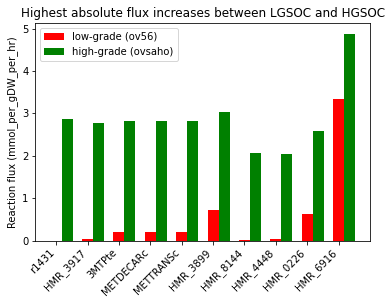

In [86]:
import numpy as np
import matplotlib.pyplot as plt
y1 = sig_increase_df[0:10]['ov56_flux']
y2 = sig_increase_df[0:10]['ovsaho_flux']

N=10
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, y1, width, label='low-grade (ov56)', color='r')
plt.bar(ind + width, y2, width,
    label='high-grade (ovsaho)', color='g')

reaction_ids = sig_increase_df[0:10]['reaction']
plt.xticks(ind, reaction_ids)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Reaction flux (mmol_per_gDW_per_hr)')
plt.title('Highest absolute flux increases between LGSOC and HGSOC')

plt.legend(loc='best')
plt.savefig('top_ten_diff_increase.png', dpi = 1200, bbox_inches='tight')
plt.show()

In [87]:
sig_increase_df = sig_increase_df.sort_values(by = ['proportion'], ascending=False)
sig_increase_df

,reaction,ov56_flux,ovsaho_flux,change,proportion,differences
43,r1431,0.000003,2.863031,sig_increase,954343.744378,2.863028
19,HMR_3641,0.000028,0.107497,sig_increase,3774.542147,0.107469
17,HMR_2827,0.000028,0.107497,sig_increase,3774.542147,0.107469
16,HMR_2825,0.000028,0.107497,sig_increase,3774.542147,0.107469
12,HMR_6725,0.000357,0.194036,sig_increase,542.956362,0.193679
36,HMR_8144,0.014355,2.075624,sig_increase,144.589475,2.061269
13,HMR_3917,0.027149,2.780310,sig_increase,102.410580,2.753161
34,HMR_4448,0.027149,2.053111,sig_increase,75.624774,2.025963
0,HMR_4418,0.000916,0.063590,sig_increase,69.392293,0.062674
45,METTRANSc,0.212011,2.827612,sig_increase,13.337115,2.615602


In [88]:
model.compartments

{'c': 'Cytosol',
 's': 'Extracellular',
 'l': 'Lysosome',
 'r': 'Endoplasmic reticulum',
 'm': 'Mitochondria',
 'p': 'Peroxisome',
 'g': 'Golgi apparatus',
 'n': 'Nucleus',
 'c_i': 'Inner mitochondria'}

In [89]:
first_portion = sig_increase_df[1:5].append(sig_increase_df[6:10])
first_portion

/var/folders/np/vk7d9bm96sv9c0b8mnzspc0c0000gn/T/ipykernel_969/2166979235.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first_portion = sig_increase_df[1:5].append(sig_increase_df[6:10])


,reaction,ov56_flux,ovsaho_flux,change,proportion,differences
19,HMR_3641,0.000028,0.107497,sig_increase,3774.542147,0.107469
17,HMR_2827,0.000028,0.107497,sig_increase,3774.542147,0.107469
16,HMR_2825,0.000028,0.107497,sig_increase,3774.542147,0.107469
12,HMR_6725,0.000357,0.194036,sig_increase,542.956362,0.193679
13,HMR_3917,0.027149,2.780310,sig_increase,102.410580,2.753161
34,HMR_4448,0.027149,2.053111,sig_increase,75.624774,2.025963
0,HMR_4418,0.000916,0.063590,sig_increase,69.392293,0.062674
45,METTRANSc,0.212011,2.827612,sig_increase,13.337115,2.615602


In [90]:
reactions = []
names = []
compartments = []
for n in range(len(first_portion['reaction'])):
    reactions.append(first_portion.iloc[n,0])
    names.append(model.reactions.get_by_id(first_portion.iloc[n,0]).name)
    compartments.append(model.reactions.get_by_id(first_portion.iloc[n,0]).compartments)
increase_1_df = pd.DataFrame(columns = ['reactions', 'equations', 'compartments'])
increase_1_df['reactions'] = reactions
increase_1_df['equations'] = names
increase_1_df['compartments'] = compartments
increase_1_df.to_csv('increase_2.csv')

In [91]:
second_portion = sig_increase_df[0:1].append(sig_increase_df[5:6])
second_portion

/var/folders/np/vk7d9bm96sv9c0b8mnzspc0c0000gn/T/ipykernel_969/4101438910.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  second_portion = sig_increase_df[0:1].append(sig_increase_df[5:6])


,reaction,ov56_flux,ovsaho_flux,change,proportion,differences
43,r1431,0.000003,2.863031,sig_increase,954343.744378,2.863028
36,HMR_8144,0.014355,2.075624,sig_increase,144.589475,2.061269


In [92]:
reactions = []
names = []
compartments = []
for n in range(len(second_portion['reaction'])):
    reactions.append(second_portion.iloc[n,0])
    names.append(model.reactions.get_by_id(second_portion.iloc[n,0]).name)
    compartments.append(model.reactions.get_by_id(second_portion.iloc[n,0]).compartments)
increase_1_df = pd.DataFrame(columns = ['reactions', 'equations', 'compartments'])
increase_1_df['reactions'] = reactions
increase_1_df['equations'] = names
increase_1_df['compartments'] = compartments
increase_1_df.to_csv('increase_3.csv')

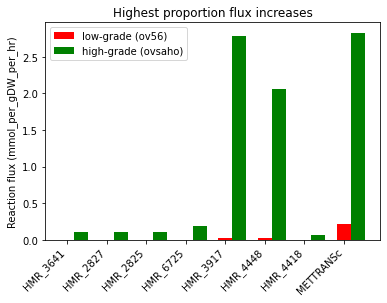

In [93]:
y1 = first_portion['ov56_flux']
y2 = first_portion['ovsaho_flux']

N=8
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, y1, width, label='low-grade (ov56)', color='r')
plt.bar(ind + width, y2, width,
    label='high-grade (ovsaho)', color='g')

reaction_ids = first_portion['reaction']
plt.xticks(ind, reaction_ids)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Reaction flux (mmol_per_gDW_per_hr)')
plt.title('Highest proportion flux increases')

plt.legend(loc='best')
plt.savefig('increase_2.png', dpi = 1200, bbox_inches='tight')
plt.show()

In [94]:
sig_decrease_df

,reaction,ov56_flux,ovsaho_flux,change,proportion
0,HMR_4281,23.955038,0.820138,sig_decrease,0.034237
1,HMR_4363,9.341044,8.382367,sig_decrease,0.897369
2,HMR_4371,0.000049,0.000014,sig_decrease,0.282296
3,HMR_4396,4.413118,0.974709,sig_decrease,0.220866
4,HMR_4122,0.000027,0.000008,sig_decrease,0.282296
...,...,...,...,...,...
567,HMR_10062,0.386775,0.109185,sig_decrease,0.282296
568,HMR_10063,0.016029,0.004525,sig_decrease,0.282296
569,HMR_10064,0.035036,0.009891,sig_decrease,0.282296
570,HMR_10065,0.000087,0.000025,sig_decrease,0.282296


In [95]:
differences = []
for n in range(len(sig_decrease_df['reaction'])):
    d = sig_decrease_df.iloc[n,1] - sig_decrease_df.iloc[n,2]
    differences.append(d)
sig_decrease_df['differences'] = differences
sig_decrease_df = sig_decrease_df.sort_values(by = ['differences'], ascending=False)
sig_decrease_df

,reaction,ov56_flux,ovsaho_flux,change,proportion,differences
26,HMR_6606,8.315994e+01,1.159600e+00,sig_decrease,0.013944,8.200034e+01
547,RE2898C,8.315994e+01,1.159600e+00,sig_decrease,0.013944,8.200034e+01
427,HMR_4993,6.146913e+01,3.085689e+00,sig_decrease,0.050199,5.838345e+01
384,HMR_4071,6.146913e+01,3.085689e+00,sig_decrease,0.050199,5.838345e+01
383,HMR_4064,6.146913e+01,3.085689e+00,sig_decrease,0.050199,5.838345e+01
...,...,...,...,...,...,...
193,HMR_2852,7.373333e-08,2.081462e-08,sig_decrease,0.282296,5.291872e-08
150,HMR_2611,7.373333e-08,2.081462e-08,sig_decrease,0.282296,5.291872e-08
476,HMR_5057,6.620690e-08,1.442427e-08,sig_decrease,0.217867,5.178262e-08
475,HMR_5052,1.517241e-07,1.007100e-07,sig_decrease,0.663771,5.101410e-08


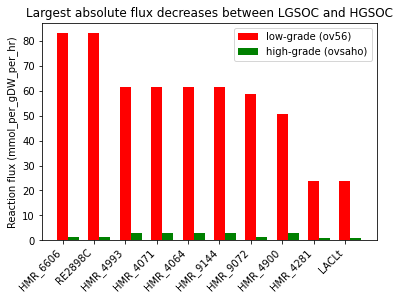

In [96]:
y1 = sig_decrease_df[0:10]['ov56_flux']
y2 = sig_decrease_df[0:10]['ovsaho_flux']

N=10
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, y1, width, label='low-grade (ov56)', color='r')
plt.bar(ind + width, y2, width,
    label='high-grade (ovsaho)', color='g')

reaction_ids = sig_decrease_df[0:10]['reaction']
plt.xticks(ind, reaction_ids)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Reaction flux (mmol_per_gDW_per_hr)')
plt.title('Largest absolute flux decreases between LGSOC and HGSOC')

plt.legend(loc='best')
plt.savefig('decrease_1.png', dpi = 1200, bbox_inches='tight')
plt.show()

In [97]:
turned_on_df = turned_on_df.sort_values(by = ['ovsaho_flux'])
turned_on_df_reverse = turned_on_df[0:10]
turned_on_df_forward = turned_on_df[572:]

In [101]:
turned_on_df

,reaction,ov56_flux,ovsaho_flux,change,proportion
266,HMR_6011,0.0,-6.834421,turned_on,0
23,HMR_4344,0.0,-4.537684,turned_on,0
250,HMR_5029,0.0,-4.514355,turned_on,0
37,HMR_3770,0.0,-2.874434,turned_on,0
399,RE1518X,0.0,-2.873859,turned_on,0
...,...,...,...,...,...
267,HMR_6046,0.0,5.989955,turned_on,0
264,HMR_6006,0.0,5.989955,turned_on,0
0,HMR_4301,0.0,6.163380,turned_on,0
246,HMR_4919,0.0,6.231722,turned_on,0


In [99]:
turned_on_df_forward['ov56_flux']

Series([], Name: ov56_flux, dtype: float64)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

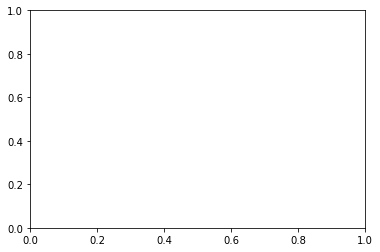

In [98]:
y1 = turned_on_df_forward['ov56_flux']
y2 = turned_on_df_forward['ovsaho_flux']

N=10
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, y1, width, label='low-grade (ov56)', color='r')
plt.bar(ind + width, y2, width,
    label='high-grade (ovsaho)', color='g')

reaction_ids = turned_on_df_forward['reaction']
plt.xticks(ind, reaction_ids)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Reaction flux (mmol_per_gDW_per_hr)')
plt.title('Top reactions switched on in HGSOC, forward direction')

plt.legend(loc='best')
plt.savefig('turned_on_1.png', dpi = 1200, bbox_inches='tight')
plt.show()

In [ ]:
reactions = []
names = []
compartments = []
for n in range(len(turned_on_df_forward['reaction'])):
    reactions.append(turned_on_df_forward.iloc[n,0])
    names.append(model.reactions.get_by_id(turned_on_df_forward.iloc[n,0]).name)
    compartments.append(model.reactions.get_by_id(turned_on_df_forward.iloc[n,0]).compartments)
increase_1_df = pd.DataFrame(columns = ['reactions', 'equations', 'compartments'])
increase_1_df['reactions'] = reactions
increase_1_df['equations'] = names
increase_1_df['compartments'] = compartments
increase_1_df.to_csv('turned_on_1.csv')

In [ ]:
y1 = turned_on_df_reverse['ov56_flux']
y2 = turned_on_df_reverse['ovsaho_flux']

N=10
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, y1, width, label='low-grade (ov56)', color='r')
plt.bar(ind + width, y2, width,
    label='high-grade (ovsaho)', color='g')

reaction_ids = turned_on_df_reverse['reaction']
plt.xticks(ind, reaction_ids)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Reaction flux (mmol_per_gDW_per_hr)')
plt.title('Top reactions switched on in HGSOC, reverse direction')

plt.legend(loc='best')
plt.savefig('turned_on_2.png', dpi = 1200, bbox_inches='tight')
plt.show()

In [ ]:
reactions = []
names = []
compartments = []
for n in range(len(turned_on_df_reverse['reaction'])):
    reactions.append(turned_on_df_reverse.iloc[n,0])
    names.append(model.reactions.get_by_id(turned_on_df_reverse.iloc[n,0]).name)
    compartments.append(model.reactions.get_by_id(turned_on_df_reverse.iloc[n,0]).compartments)
increase_1_df = pd.DataFrame(columns = ['reactions', 'equations', 'compartments'])
increase_1_df['reactions'] = reactions
increase_1_df['equations'] = names
increase_1_df['compartments'] = compartments
increase_1_df.to_csv('turned_on_2.csv')

In [ ]:
turned_off_df = turned_off_df.sort_values(by = ['ov56_flux'])
turned_off_df_reverse = turned_off_df[0:10]
turned_off_df_forward = turned_off_df[704:]

In [ ]:
turned_off_df_forward

In [ ]:
y1 = turned_off_df_reverse['ov56_flux']
y2 = turned_off_df_reverse['ovsaho_flux']

N=10
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, y1, width, label='low-grade (ov56)', color='r')
plt.bar(ind + width, y2, width,
    label='high-grade (ovsaho)', color='g')

reaction_ids = turned_off_df_reverse['reaction']
plt.xticks(ind, reaction_ids)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Reaction flux (mmol_per_gDW_per_hr)')
plt.title('Top reactions switched off in HGSOC, reverse direction')

plt.legend(loc='best')
plt.savefig('turned_off_1.png', dpi = 1200, bbox_inches='tight')
plt.show()

In [ ]:
reactions = []
names = []
compartments = []
for n in range(len(turned_off_df_reverse['reaction'])):
    reactions.append(turned_off_df_reverse.iloc[n,0])
    names.append(model.reactions.get_by_id(turned_off_df_reverse.iloc[n,0]).name)
    compartments.append(model.reactions.get_by_id(turned_off_df_reverse.iloc[n,0]).compartments)
increase_1_df = pd.DataFrame(columns = ['reactions', 'equations', 'compartments'])
increase_1_df['reactions'] = reactions
increase_1_df['equations'] = names
increase_1_df['compartments'] = compartments
increase_1_df.to_csv('turned_off_1.csv')

In [ ]:
y1 = turned_off_df_forward['ov56_flux']
y2 = turned_off_df_forward['ovsaho_flux']

N=10
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, y1, width, label='low-grade (ov56)', color='r')
plt.bar(ind + width, y2, width,
    label='high-grade (ovsaho)', color='g')

reaction_ids = turned_off_df_forward['reaction']
plt.xticks(ind, reaction_ids)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Reaction flux (mmol_per_gDW_per_hr)')
plt.title('Top reactions switched off in HGSOC, forward direction')

plt.legend(loc='best')
plt.savefig('turned_off_2.png', dpi = 1200, bbox_inches='tight')
plt.show()

In [ ]:
reactions = []
names = []
compartments = []
for n in range(len(turned_off_df_forward['reaction'])):
    reactions.append(turned_off_df_forward.iloc[n,0])
    names.append(model.reactions.get_by_id(turned_off_df_forward.iloc[n,0]).name)
    compartments.append(model.reactions.get_by_id(turned_off_df_forward.iloc[n,0]).compartments)
increase_1_df = pd.DataFrame(columns = ['reactions', 'equations', 'compartments'])
increase_1_df['reactions'] = reactions
increase_1_df['equations'] = names
increase_1_df['compartments'] = compartments
increase_1_df.to_csv('turned_off_2.csv')

In [102]:
difference = []
for n in range(len(change_d_df)):
    if change_d_df.iloc[n,2] > 0:
        d = change_d_df.iloc[n,2] - change_d_df.iloc[n,1]
        difference.append(d)
    if change_d_df.iloc[n,1] > 0:
        d = change_d_df.iloc[n,1] - change_d_df.iloc[n,2]
        difference.append(d)
change_d_df['differences'] = difference
change_d_df

,reaction,ov56_flux,ovsaho_flux,change,proportion,differences
0,HMR_4388,-19.408553,7.768040,change_d,0,27.176593
1,HMR_4280,5.757557,-1.753756,change_d,0,7.511313
2,HMR_4354,4.088058,-0.062657,change_d,0,4.150714
3,HMR_7802,0.000004,-0.201634,change_d,0,0.201637
4,HMR_3820,0.200763,-0.464668,change_d,0,0.665431
...,...,...,...,...,...,...
62,MDHx,-1.767499,1.637569,change_d,0,3.405068
63,PPItm,0.893225,-2.552283,change_d,0,3.445508
64,RPEc,0.105584,-0.293882,change_d,0,0.399466
65,HXCOAc,23.153626,-2.563585,change_d,0,25.717211


In [103]:
change_d_df = change_d_df.sort_values(by = ['differences'], ascending=False)
change_d_df_subset = change_d_df[0:6]
change_d_df_subset_1 = change_d_df[7:11]
change_d_df_subset_2 = change_d_df_subset.append(change_d_df_subset_1)

/var/folders/np/vk7d9bm96sv9c0b8mnzspc0c0000gn/T/ipykernel_969/3174875403.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  change_d_df_subset_2 = change_d_df_subset.append(change_d_df_subset_1)


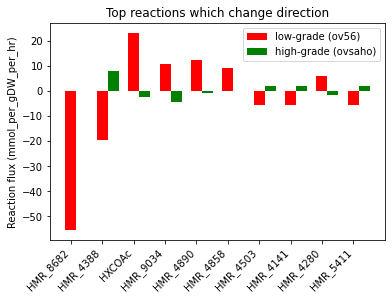

In [104]:
y1 = change_d_df_subset_2['ov56_flux']
y2 = change_d_df_subset_2['ovsaho_flux']

N=10
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, y1, width, label='low-grade (ov56)', color='r')
plt.bar(ind + width, y2, width,
    label='high-grade (ovsaho)', color='g')

reaction_ids = change_d_df_subset_2['reaction']
plt.xticks(ind, reaction_ids)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Reaction flux (mmol_per_gDW_per_hr)')
plt.title('Top reactions which change direction')

plt.legend(loc='best')
plt.savefig('changed_direction.png', dpi = 1200, bbox_inches='tight')
plt.show()

In [105]:
change_d_subset = change_d_df[0:10]

In [106]:
reactions = []
names = []
compartments = []
for n in range(len(change_d_df_subset_2['reaction'])):
    reactions.append(change_d_df_subset_2.iloc[n,0])
    names.append(model.reactions.get_by_id(change_d_df_subset_2.iloc[n,0]).name)
    compartments.append(model.reactions.get_by_id(change_d_df_subset_2.iloc[n,0]).compartments)
increase_1_df = pd.DataFrame(columns = ['reactions', 'equations', 'compartments'])
increase_1_df['reactions'] = reactions
increase_1_df['equations'] = names
increase_1_df['compartments'] = compartments
increase_1_df.to_csv('change_d.csv')

# which of the changed reaction are essential reactions?

In [107]:
essential_sig_increase = []
for r in sig_increase_df['reaction']:
    if r in one_gene_forward_essential_reactions:
         essential_sig_increase.append(r)
essential_sig_decrease = []
for r in sig_decrease_df['reaction']:
    if r in one_gene_forward_essential_reactions:
         essential_sig_decrease.append(r)
essential_turned_on = []
for r in turned_on_df['reaction']:
    if r in one_gene_forward_essential_reactions:
         essential_turned_on.append(r)
essential_turned_off = []
for r in turned_off_df['reaction']:
    if r in one_gene_forward_essential_reactions:
         essential_turned_off.append(r)
essential_change_d = []
for r in change_d_df['reaction']:
    if r in one_gene_forward_essential_reactions:
         essential_change_d.append(r)

In [108]:
print(len(essential_sig_increase))
print(len(essential_sig_decrease))
print(len(essential_turned_on))
print(len(essential_turned_off))
print(len(essential_change_d))

2
138
0
0
0


In [109]:
one_gene_forward_essential_reactions

['HMR_4371',
 'HMR_4122',
 'HMR_9727',
 'HMR_4020',
 'HMR_4030',
 'HMR_3931',
 'HMR_4034',
 'HMR_4036',
 'HMR_4050',
 'HMR_4577',
 'HMR_4608',
 'HMR_4575',
 'HMR_7160',
 'HMR_3839',
 'HMR_3841',
 'HMR_6974',
 'HMR_6979',
 'HMR_6980',
 'HMR_6981',
 'HMR_6982',
 'HMR_4250',
 'HMR_4214',
 'HMR_4216',
 'HMR_4220',
 'HMR_4225',
 'HMR_3875',
 'HMR_4324',
 'HMR_4326',
 'HMR_4158',
 'HMR_4300',
 'HMR_4628',
 'HMR_4631',
 'HMR_5130',
 'HMR_5131',
 'HMR_5132',
 'HMR_5133',
 'HMR_5134',
 'HMR_5135',
 'HMR_5136',
 'HMR_5137',
 'HMR_5138',
 'HMR_5139',
 'HMR_5140',
 'HMR_5141',
 'HMR_5142',
 'HMR_5143',
 'HMR_5145',
 'HMR_5146',
 'HMR_5147',
 'HMR_5148',
 'HMR_5149',
 'HMR_5150',
 'HMR_5281',
 'HMR_4145',
 'HMR_1015',
 'HMR_1080',
 'HMR_1093',
 'HMR_6901',
 'HMR_6903',
 'HMR_6905',
 'HMR_6906',
 'HMR_0786',
 'HMR_0579',
 'HMR_0580',
 'HMR_0581',
 'HMR_0592',
 'HMR_0598',
 'HMR_0610',
 'HMR_4228',
 'HMR_4251',
 'HMR_4269',
 'HMR_6634',
 'HMR_6641',
 'HMR_6642',
 'HMR_6649',
 'HMR_6654',
 'HMR_6655',

In [110]:
essential_sig_increase

['HMR_3841', 'HMR_3839']

In [111]:
for n in range(len(sig_increase_df['reaction'])):
    if sig_increase_df.iloc[n,0] == 'HMR_3841':
        print(n)
    if sig_increase_df.iloc[n,0] == 'HMR_3839':
        print(n)
    if sig_increase_df.iloc[n,0] == 'HMR_6629':
        print(n)
        print(sig_increase_df.iloc[n,:])

39
40


In [112]:
a = sig_increase_df.iloc[15,:]
b = sig_increase_df.iloc[16,:]
c = sig_increase_df.iloc[30,:]

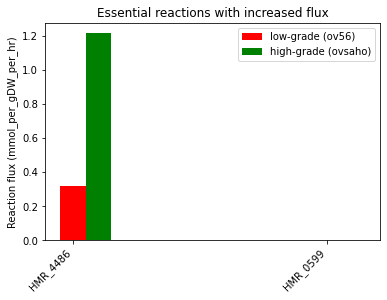

In [113]:
y1 = [a[1], b[1]]
y2 = [a[2], b[2]]

N=2
ind = np.arange(N) 
width = 0.1       
plt.bar(ind, y1, width, label='low-grade (ov56)', color='r')
plt.bar(ind + width, y2, width,
    label='high-grade (ovsaho)', color='g')

reaction_ids = [a[0], b[0]]
plt.xticks(ind, reaction_ids)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Reaction flux (mmol_per_gDW_per_hr)')
plt.title('Essential reactions with increased flux')

plt.legend(loc='best')
plt.savefig('essential_increase.png', dpi = 1200, bbox_inches='tight')
plt.show()

In [114]:
print(model.reactions.get_by_id('HMR_3841').name)
print(model.reactions.get_by_id('HMR_3841').compartments)

-1.0 3-phosphonooxypyruvate + -1.0 glutamate <--> 1.0 3-phosphoserine + 1.0 AKG
{'c'}


In [115]:
print(model.reactions.get_by_id('HMR_3839').name)
print(model.reactions.get_by_id('HMR_3839').compartments)

-1.0 3-phospho-D-glycerate + -1.0 NAD+ <--> 1.0 3-phosphonooxypyruvate + 1.0 H+ + 1.0 NADH
{'c'}


In [116]:
#names of the dataframes. search through and find most interesting relationships and reactions
#also search through the top subsets I have plotted
#some might just be explained by media conditions. have a proper think about why they have changed rate
#go to literature
#sig_increase_df
#sig_decrease_df
#turned_on_df
#turned_off_df
#change_d_df

In [117]:
sig_increase_df

,reaction,ov56_flux,ovsaho_flux,change,proportion,differences
43,r1431,0.000003,2.863031,sig_increase,954343.744378,2.863028
19,HMR_3641,0.000028,0.107497,sig_increase,3774.542147,0.107469
17,HMR_2827,0.000028,0.107497,sig_increase,3774.542147,0.107469
16,HMR_2825,0.000028,0.107497,sig_increase,3774.542147,0.107469
12,HMR_6725,0.000357,0.194036,sig_increase,542.956362,0.193679
36,HMR_8144,0.014355,2.075624,sig_increase,144.589475,2.061269
13,HMR_3917,0.027149,2.780310,sig_increase,102.410580,2.753161
34,HMR_4448,0.027149,2.053111,sig_increase,75.624774,2.025963
0,HMR_4418,0.000916,0.063590,sig_increase,69.392293,0.062674
45,METTRANSc,0.212011,2.827612,sig_increase,13.337115,2.615602


In [118]:
overexpressed = pd.read_csv(r'/Users/katemeeson/august_2022/overexpressed_enrichment_2.csv')
overexpressed

,system,obs,exp
0,Folate metabolism,3,65
1,Purine metabolism,2,109
2,Cysteine and methionine metabolism,3,47
3,Transport reactions,6,1000
4,"Alanine, aspartate and glutamate metabolism",1,40
5,Fatty acid oxidation,3,524
6,Carnitine shuttle (mitochondrial),1,112
7,Oxidative phosphorylation,1,10
8,"Glycine, serine and threonine metabolism",3,66
9,Fatty acid activation (cytosolic),1,67


In [119]:
obs_percentage = []
exp_percentage = []
for n in range(len(overexpressed['system'])):
    obs_percentage.append(100*(overexpressed.iloc[n,1]/overexpressed.iloc[14,1]))
    exp_percentage.append(100*(overexpressed.iloc[n,2]/overexpressed.iloc[14,2]))
overexpressed['obs_percentage'] = obs_percentage
overexpressed['exp_percentage'] = exp_percentage
overexpressed

,system,obs,exp,obs_percentage,exp_percentage
0,Folate metabolism,3,65,9.677419,2.750741
1,Purine metabolism,2,109,6.451613,4.612780
2,Cysteine and methionine metabolism,3,47,9.677419,1.988997
3,Transport reactions,6,1000,19.354839,42.319086
4,"Alanine, aspartate and glutamate metabolism",1,40,3.225806,1.692763
5,Fatty acid oxidation,3,524,9.677419,22.175201
6,Carnitine shuttle (mitochondrial),1,112,3.225806,4.739738
7,Oxidative phosphorylation,1,10,3.225806,0.423191
8,"Glycine, serine and threonine metabolism",3,66,9.677419,2.793060
9,Fatty acid activation (cytosolic),1,67,3.225806,2.835379


In [120]:
ratio_of_overenrichment = []
for n in range(len(overexpressed['system'])):
    ratio_of_overenrichment.append(overexpressed.iloc[n,3]/overexpressed.iloc[n,4])
overexpressed['ratio_of_overenrichment'] = ratio_of_overenrichment
overexpressed = overexpressed.sort_values(by = ['ratio_of_overenrichment'], ascending=False)
overexpressed

,system,obs,exp,obs_percentage,exp_percentage,ratio_of_overenrichment
7,Oxidative phosphorylation,1,10,3.225806,0.423191,7.622581
13,Histidine metabolism,2,20,6.451613,0.846382,7.622581
2,Cysteine and methionine metabolism,3,47,9.677419,1.988997,4.865477
0,Folate metabolism,3,65,9.677419,2.750741,3.518114
8,"Glycine, serine and threonine metabolism",3,66,9.677419,2.793060,3.464809
10,Arginine and proline metabolism,3,100,9.677419,4.231909,2.286774
4,"Alanine, aspartate and glutamate metabolism",1,40,3.225806,1.692763,1.905645
12,Lysine metabolism,1,42,3.225806,1.777402,1.814900
1,Purine metabolism,2,109,6.451613,4.612780,1.398639
9,Fatty acid activation (cytosolic),1,67,3.225806,2.835379,1.137699


In [122]:
obs_ratios = obs_ratios[0:14]
exp_ratios = exp_ratios[0:14]

NameError: name 'obs_ratios' is not defined

In [ ]:
from scipy.stats import chisquare
chisquare(obs_ratios, f_exp=exp_ratios)
#df = rows-1 (*1 col.no.) = 13. go to table

In [ ]:
sig_decrease_df.sort_values(by=['differences'], ascending=False)[0:30]

In [ ]:
underexpressed = pd.read_csv(r'/Users/katemeeson/august_2022/underexpressed_enrichment_2.csv')
underexpressed

In [ ]:
obs_percentage = []
exp_percentage = []
for n in range(len(underexpressed['subsystem'])):
    obs_percentage.append(100*(underexpressed.iloc[n,1]/underexpressed.iloc[12,1]))
    exp_percentage.append(100*(underexpressed.iloc[n,2]/underexpressed.iloc[12,2]))
underexpressed['obs_percentage'] = obs_percentage
underexpressed['exp_percentage'] = exp_percentage
underexpressed

In [ ]:
ratio_of_overenrichment = []
for n in range(len(underexpressed['subsystem'])):
    ratio_of_overenrichment.append(underexpressed.iloc[n,3]/underexpressed.iloc[n,4])
underexpressed['ratio_of_overenrichment'] = ratio_of_overenrichment
underexpressed = underexpressed.sort_values(by = ['ratio_of_overenrichment'], ascending=False)
underexpressed

In [ ]:
change_d_df.sort_values(by=['differences'], ascending=False)[0:31]

In [123]:
change_d_reactions = pd.read_csv(r'/Users/katemeeson/august_2022/change_d_reactions.csv')
change_d_reactions

,subsystem,obs,exp
0,Glycolysis / Gluconeogenesis,1,38
1,Transport reactions,9,1000
2,Tricarboxylic acid cycle and glyoxylate/dicarb...,4,47
3,Folate metabolism,3,65
4,N-glycan metabolism,1,95
5,"Glycine, serine and threonine metabolism",2,66
6,Pentose phosphate pathway,1,31
7,Miscellaneous,2,85
8,Pyrimidine metabolism,1,78
9,Nucleotide metabolism,1,125


In [124]:
obs_percentage = []
exp_percentage = []
for n in range(len(change_d_reactions['subsystem'])):
    obs_percentage.append(100*(change_d_reactions.iloc[n,1]/change_d_reactions.iloc[13,1]))
    exp_percentage.append(100*(change_d_reactions.iloc[n,2]/change_d_reactions.iloc[13,2]))
change_d_reactions['obs_percentage'] = obs_percentage
change_d_reactions['exp_percentage'] = exp_percentage
change_d_reactions

,subsystem,obs,exp,obs_percentage,exp_percentage
0,Glycolysis / Gluconeogenesis,1,38,3.333333,1.647875
1,Transport reactions,9,1000,30.000000,43.365134
2,Tricarboxylic acid cycle and glyoxylate/dicarb...,4,47,13.333333,2.038161
3,Folate metabolism,3,65,10.000000,2.818734
4,N-glycan metabolism,1,95,3.333333,4.119688
5,"Glycine, serine and threonine metabolism",2,66,6.666667,2.862099
6,Pentose phosphate pathway,1,31,3.333333,1.344319
7,Miscellaneous,2,85,6.666667,3.686036
8,Pyrimidine metabolism,1,78,3.333333,3.382480
9,Nucleotide metabolism,1,125,3.333333,5.420642


In [125]:
ratio_of_overenrichment = []
for n in range(len(change_d_reactions['subsystem'])):
    ratio_of_overenrichment.append(change_d_reactions.iloc[n,3]/change_d_reactions.iloc[n,4])
change_d_reactions['ratio_of_overenrichment'] = ratio_of_overenrichment
change_d_reactions = change_d_reactions.sort_values(by = ['ratio_of_overenrichment'], ascending=False)
change_d_reactions

,subsystem,obs,exp,obs_percentage,exp_percentage,ratio_of_overenrichment
2,Tricarboxylic acid cycle and glyoxylate/dicarb...,4,47,13.333333,2.038161,6.541844
3,Folate metabolism,3,65,10.000000,2.818734,3.547692
6,Pentose phosphate pathway,1,31,3.333333,1.344319,2.479570
5,"Glycine, serine and threonine metabolism",2,66,6.666667,2.862099,2.329293
0,Glycolysis / Gluconeogenesis,1,38,3.333333,1.647875,2.022807
11,"Alanine, aspartate and glutamate metabolism",1,40,3.333333,1.734605,1.921667
7,Miscellaneous,2,85,6.666667,3.686036,1.808627
13,total,30,2306,100.000000,100.000000,1.000000
8,Pyrimidine metabolism,1,78,3.333333,3.382480,0.985470
4,N-glycan metabolism,1,95,3.333333,4.119688,0.809123


In [126]:
turned_on_df[0:10]

,reaction,ov56_flux,ovsaho_flux,change,proportion
266,HMR_6011,0.0,-6.834421,turned_on,0
23,HMR_4344,0.0,-4.537684,turned_on,0
250,HMR_5029,0.0,-4.514355,turned_on,0
37,HMR_3770,0.0,-2.874434,turned_on,0
399,RE1518X,0.0,-2.873859,turned_on,0
280,HMR_9639,0.0,-2.854320,turned_on,0
15,HMR_6602,0.0,-2.854320,turned_on,0
440,IBUP_Rtdu,0.0,-2.854320,turned_on,0
438,CE1401te,0.0,-2.772647,turned_on,0
10,HMR_4004,0.0,-2.552053,turned_on,0


In [127]:
turned_on_df[562:]

,reaction,ov56_flux,ovsaho_flux,change,proportion


In [128]:
turned_on_reactions = pd.read_csv(r'/Users/katemeeson/august_2022/turned_on_reactions.csv')
turned_on_reactions

,subsystem,obs,exp
0,Transport reactions,10,1000
1,Biopterin metabolism,1,27
2,"Glycine, serine and threonine metabolism",4,66
3,Purine metabolism,2,109
4,Arginine and proline metabolism,1,100
5,Pyrimidine metabolism,1,78
6,Glycolysis / Gluconeogenesis,2,38
7,Exchange/demand reactions,2,1000
8,Pyruvate metabolism,1,34
9,"Valine, leucine, and isoleucine metabolism",2,58


In [129]:
obs_percentage = []
exp_percentage = []
for n in range(len(turned_on_reactions['subsystem'])):
    obs_percentage.append(100*(turned_on_reactions.iloc[n,1]/turned_on_reactions.iloc[13,1]))
    exp_percentage.append(100*(turned_on_reactions.iloc[n,2]/turned_on_reactions.iloc[13,2]))
turned_on_reactions['obs_percentage'] = obs_percentage
turned_on_reactions['exp_percentage'] = exp_percentage
turned_on_reactions

,subsystem,obs,exp,obs_percentage,exp_percentage
0,Transport reactions,10,1000,33.333333,37.327361
1,Biopterin metabolism,1,27,3.333333,1.007839
2,"Glycine, serine and threonine metabolism",4,66,13.333333,2.463606
3,Purine metabolism,2,109,6.666667,4.068682
4,Arginine and proline metabolism,1,100,3.333333,3.732736
5,Pyrimidine metabolism,1,78,3.333333,2.911534
6,Glycolysis / Gluconeogenesis,2,38,6.666667,1.418440
7,Exchange/demand reactions,2,1000,6.666667,37.327361
8,Pyruvate metabolism,1,34,3.333333,1.269130
9,"Valine, leucine, and isoleucine metabolism",2,58,6.666667,2.164987


In [130]:
ratio_of_overenrichment = []
for n in range(len(turned_on_reactions['subsystem'])):
    ratio_of_overenrichment.append(turned_on_reactions.iloc[n,3]/turned_on_reactions.iloc[n,4])
turned_on_reactions['ratio_of_overenrichment'] = ratio_of_overenrichment
turned_on_reactions = turned_on_reactions.sort_values(by = ['ratio_of_overenrichment'], ascending=False)
turned_on_reactions

,subsystem,obs,exp,obs_percentage,exp_percentage,ratio_of_overenrichment
2,"Glycine, serine and threonine metabolism",4,66,13.333333,2.463606,5.412121
6,Glycolysis / Gluconeogenesis,2,38,6.666667,1.418440,4.700000
1,Biopterin metabolism,1,27,3.333333,1.007839,3.307407
9,"Valine, leucine, and isoleucine metabolism",2,58,6.666667,2.164987,3.079310
12,Folate metabolism,2,65,6.666667,2.426278,2.747692
8,Pyruvate metabolism,1,34,3.333333,1.269130,2.626471
11,Cysteine and methionine metabolism,1,47,3.333333,1.754386,1.900000
3,Purine metabolism,2,109,6.666667,4.068682,1.638532
10,Carnitine shuttle (cytosolic),1,57,3.333333,2.127660,1.566667
5,Pyrimidine metabolism,1,78,3.333333,2.911534,1.144872


In [131]:
print(len(turned_off_df[694:]))
print(turned_off_df[694:])

4
      reaction  ov56_flux  ovsaho_flux      change  proportion
694   PTVSTitr  -0.070389          0.0  turned_off           0
695     OHCLtm  20.268084          0.0  turned_off           0
696   CLCFTRtm  20.268084          0.0  turned_off           0
697  HMR_10053   0.001109          0.0  turned_off           0


In [132]:
print(len(turned_off_df[:10]))
print(turned_off_df[:10])

10
   reaction  ov56_flux  ovsaho_flux      change  proportion
0  HMR_4379   5.731686          0.0  turned_off           0
1  HMR_5395   0.916422          0.0  turned_off           0
2  HMR_5396   0.916422          0.0  turned_off           0
3  HMR_5397   0.916422          0.0  turned_off           0
4  HMR_5398   0.916422          0.0  turned_off           0
5  HMR_5401   0.916422          0.0  turned_off           0
6  HMR_4130   5.359310          0.0  turned_off           0
7  HMR_4131  -1.267038          0.0  turned_off           0
8  HMR_8767   4.092273          0.0  turned_off           0
9  HMR_4315   4.228049          0.0  turned_off           0


In [133]:
turned_off_df[:15]

,reaction,ov56_flux,ovsaho_flux,change,proportion
0,HMR_4379,5.731686,0.0,turned_off,0
1,HMR_5395,0.916422,0.0,turned_off,0
2,HMR_5396,0.916422,0.0,turned_off,0
3,HMR_5397,0.916422,0.0,turned_off,0
4,HMR_5398,0.916422,0.0,turned_off,0
5,HMR_5401,0.916422,0.0,turned_off,0
6,HMR_4130,5.359310,0.0,turned_off,0
7,HMR_4131,-1.267038,0.0,turned_off,0
8,HMR_8767,4.092273,0.0,turned_off,0
9,HMR_4315,4.228049,0.0,turned_off,0


In [134]:
turned_off_reactions = pd.read_csv(r'/Users/katemeeson/august_2022/turned_off_reactions.csv')
turned_off_reactions

,subsystem,obs,exp
0,Transport reactions,13,1000
1,"Valine, leucine, and isoleucine metabolism",1,58
2,Exchange/demand reactions,3,1000
3,Drug metabolism,5,572
4,Fatty acid oxidation,2,524
5,Cysteine and methionine metabolism,2,47
6,Linoleate metabolism,2,35
7,Purine metabolism,1,109
8,Oxidative phosphorylation,1,10
9,total,30,3355


In [135]:
obs_percentage = []
exp_percentage = []
for n in range(len(turned_off_reactions['subsystem'])):
    obs_percentage.append(100*(turned_off_reactions.iloc[n,1]/turned_off_reactions.iloc[9,1]))
    exp_percentage.append(100*(turned_off_reactions.iloc[n,2]/turned_off_reactions.iloc[9,2]))
turned_off_reactions['obs_percentage'] = obs_percentage
turned_off_reactions['exp_percentage'] = exp_percentage
turned_off_reactions

,subsystem,obs,exp,obs_percentage,exp_percentage
0,Transport reactions,13,1000,43.333333,29.806259
1,"Valine, leucine, and isoleucine metabolism",1,58,3.333333,1.728763
2,Exchange/demand reactions,3,1000,10.000000,29.806259
3,Drug metabolism,5,572,16.666667,17.049180
4,Fatty acid oxidation,2,524,6.666667,15.618480
5,Cysteine and methionine metabolism,2,47,6.666667,1.400894
6,Linoleate metabolism,2,35,6.666667,1.043219
7,Purine metabolism,1,109,3.333333,3.248882
8,Oxidative phosphorylation,1,10,3.333333,0.298063
9,total,30,3355,100.000000,100.000000


In [136]:
ratio_of_overenrichment = []
for n in range(len(turned_off_reactions['subsystem'])):
    ratio_of_overenrichment.append(turned_off_reactions.iloc[n,3]/turned_off_reactions.iloc[n,4])
turned_off_reactions['ratio_of_overenrichment'] = ratio_of_overenrichment
turned_off_reactions = turned_off_reactions.sort_values(by = ['ratio_of_overenrichment'], ascending=False)
turned_off_reactions

,subsystem,obs,exp,obs_percentage,exp_percentage,ratio_of_overenrichment
8,Oxidative phosphorylation,1,10,3.333333,0.298063,11.183333
6,Linoleate metabolism,2,35,6.666667,1.043219,6.390476
5,Cysteine and methionine metabolism,2,47,6.666667,1.400894,4.758865
1,"Valine, leucine, and isoleucine metabolism",1,58,3.333333,1.728763,1.928161
0,Transport reactions,13,1000,43.333333,29.806259,1.453833
7,Purine metabolism,1,109,3.333333,3.248882,1.025994
9,total,30,3355,100.000000,100.000000,1.000000
3,Drug metabolism,5,572,16.666667,17.049180,0.977564
4,Fatty acid oxidation,2,524,6.666667,15.618480,0.426845
2,Exchange/demand reactions,3,1000,10.000000,29.806259,0.335500


In [137]:
#reactions involved in oxphos, tca, ppp, glcolysis. 
#reactions involved in drug metabolism. 

In [138]:
model.reactions.get_by_id('HMR_3975')

Reaction identifier,HMR_3975
Name,-1.0 H2O + -1.0 PPi --> 1.0 H+ + 2.0 Pi
Memory address,0x13cd2ea30
Stoichiometry,m02040r + m02759r --> m02039r + 2.0 m02751r H2O + PPi --> H+ + 2.0 Pi
GPR,ENSG00000107902 or ENSG00000138777 or ENSG00000143363 or ENSG00000180817
Lower bound,0
Upper bound,19.342472591


In [139]:
ox_phos_ids = ['HMR_3975','HMR_3977','HMR_3979','HMR_6911','HMR_6912','HMR_6914','HMR_6916','HMR_6918','HMR_6921','HMR_13081']

In [140]:
sig_increase_df

,reaction,ov56_flux,ovsaho_flux,change,proportion,differences
43,r1431,0.000003,2.863031,sig_increase,954343.744378,2.863028
19,HMR_3641,0.000028,0.107497,sig_increase,3774.542147,0.107469
17,HMR_2827,0.000028,0.107497,sig_increase,3774.542147,0.107469
16,HMR_2825,0.000028,0.107497,sig_increase,3774.542147,0.107469
12,HMR_6725,0.000357,0.194036,sig_increase,542.956362,0.193679
36,HMR_8144,0.014355,2.075624,sig_increase,144.589475,2.061269
13,HMR_3917,0.027149,2.780310,sig_increase,102.410580,2.753161
34,HMR_4448,0.027149,2.053111,sig_increase,75.624774,2.025963
0,HMR_4418,0.000916,0.063590,sig_increase,69.392293,0.062674
45,METTRANSc,0.212011,2.827612,sig_increase,13.337115,2.615602


In [141]:
ox_phos_ids_2 = []
ox_phos_ov56 = []
ox_phos_ovsaho = []

for i in ox_phos_ids:
    for n in range(len(sig_increase_df)):
        if i == sig_increase_df.iloc[n,0]:
            ox_phos_ids_2.append(sig_increase_df.iloc[n,0])
            ox_phos_ov56.append(sig_increase_df.iloc[n,1])
            ox_phos_ovsaho.append(sig_increase_df.iloc[n,2])
    for n in range(len(sig_decrease_df)):
        if i == sig_decrease_df.iloc[n,0]:
            ox_phos_ids_2.append(sig_decrease_df.iloc[n,0])
            ox_phos_ov56.append(sig_decrease_df.iloc[n,1])
            ox_phos_ovsaho.append(sig_decrease_df.iloc[n,2])
    for n in range(len(turned_on_df)):
        if i == turned_on_df.iloc[n,0]:
            ox_phos_ids_2.append(turned_on_df.iloc[n,0])
            ox_phos_ov56.append(turned_on_df.iloc[n,1])
            ox_phos_ovsaho.append(turned_on_df.iloc[n,2])
    for n in range(len(turned_off_df)):
        if i == turned_off_df.iloc[n,0]:
            ox_phos_ids_2.append(turned_off_df.iloc[n,0])
            ox_phos_ov56.append(turned_off_df.iloc[n,1])
            ox_phos_ovsaho.append(turned_off_df.iloc[n,2])
    for n in range(len(change_d_df)):
        if i == change_d_df.iloc[n,0]:
            ox_phos_ids_2.append(change_d_df.iloc[n,0])
            ox_phos_ov56.append(change_d_df.iloc[n,1])
            ox_phos_ovsaho.append(change_d_df.iloc[n,2])
print('number of oxphos reactions =', len(ox_phos_ids_2))
print(len(ox_phos_ov56))
print(len(ox_phos_ovsaho))

number of oxphos reactions = 3
3
3


In [142]:
ppp = pd.read_csv(r'/Users/katemeeson/august_2022/ppp.csv')
ppp = ppp['reactions'].to_list()

ppp_ids_2 = []
ppp_ov56 = []
ppp_ovsaho = []

for i in ppp:
    for n in range(len(sig_increase_df)):
        if i == sig_increase_df.iloc[n,0]:
            ppp_ids_2.append(sig_increase_df.iloc[n,0])
            ppp_ov56.append(sig_increase_df.iloc[n,1])
            ppp_ovsaho.append(sig_increase_df.iloc[n,2])
    for n in range(len(sig_decrease_df)):
        if i == sig_decrease_df.iloc[n,0]:
            ppp_ids_2.append(sig_decrease_df.iloc[n,0])
            ppp_ov56.append(sig_decrease_df.iloc[n,1])
            ppp_ovsaho.append(sig_decrease_df.iloc[n,2])
    for n in range(len(turned_on_df)):
        if i == turned_on_df.iloc[n,0]:
            ppp_ids_2.append(turned_on_df.iloc[n,0])
            ppp_ov56.append(turned_on_df.iloc[n,1])
            ppp_ovsaho.append(turned_on_df.iloc[n,2])
    for n in range(len(turned_off_df)):
        if i == turned_off_df.iloc[n,0]:
            ppp_ids_2.append(turned_off_df.iloc[n,0])
            ppp_ov56.append(turned_off_df.iloc[n,1])
            ppp_ovsaho.append(turned_off_df.iloc[n,2])
    for n in range(len(change_d_df)):
        if i == change_d_df.iloc[n,0]:
            ppp_ids_2.append(change_d_df.iloc[n,0])
            ppp_ov56.append(change_d_df.iloc[n,1])
            ppp_ovsaho.append(change_d_df.iloc[n,2])
print('number of ppp reactions =', len(ppp_ids_2))

number of ppp reactions = 6


In [143]:
tca = pd.read_csv(r'/Users/katemeeson/august_2022/tca.csv')
tca = tca['reactions'].to_list()

tca_ids_2 = []
tca_ov56 = []
tca_ovsaho = []

for i in tca:
    for n in range(len(sig_increase_df)):
        if i == sig_increase_df.iloc[n,0]:
            tca_ids_2.append(sig_increase_df.iloc[n,0])
            tca_ov56.append(sig_increase_df.iloc[n,1])
            tca_ovsaho.append(sig_increase_df.iloc[n,2])
    for n in range(len(sig_decrease_df)):
        if i == sig_decrease_df.iloc[n,0]:
            tca_ids_2.append(sig_decrease_df.iloc[n,0])
            tca_ov56.append(sig_decrease_df.iloc[n,1])
            tca_ovsaho.append(sig_decrease_df.iloc[n,2])
    for n in range(len(turned_on_df)):
        if i == turned_on_df.iloc[n,0]:
            tca_ids_2.append(turned_on_df.iloc[n,0])
            tca_ov56.append(turned_on_df.iloc[n,1])
            tca_ovsaho.append(turned_on_df.iloc[n,2])
    for n in range(len(turned_off_df)):
        if i == turned_off_df.iloc[n,0]:
            tca_ids_2.append(turned_off_df.iloc[n,0])
            tca_ov56.append(turned_off_df.iloc[n,1])
            tca_ovsaho.append(turned_off_df.iloc[n,2])
    for n in range(len(change_d_df)):
        if i == change_d_df.iloc[n,0]:
            tca_ids_2.append(change_d_df.iloc[n,0])
            tca_ov56.append(change_d_df.iloc[n,1])
            tca_ovsaho.append(change_d_df.iloc[n,2])
print('number of tca reactions =', len(tca_ids_2))

number of tca reactions = 19


In [144]:
gg = pd.read_csv(r'/Users/katemeeson/august_2022/gg.csv')
gg = gg['reactions'].to_list()

gg_ids_2 = []
gg_ov56 = []
gg_ovsaho = []

for i in gg:
    for n in range(len(sig_increase_df)):
        if i == sig_increase_df.iloc[n,0]:
            gg_ids_2.append(sig_increase_df.iloc[n,0])
            gg_ov56.append(sig_increase_df.iloc[n,1])
            gg_ovsaho.append(sig_increase_df.iloc[n,2])
    for n in range(len(sig_decrease_df)):
        if i == sig_decrease_df.iloc[n,0]:
            gg_ids_2.append(sig_decrease_df.iloc[n,0])
            gg_ov56.append(sig_decrease_df.iloc[n,1])
            gg_ovsaho.append(sig_decrease_df.iloc[n,2])
    for n in range(len(turned_on_df)):
        if i == turned_on_df.iloc[n,0]:
            gg_ids_2.append(turned_on_df.iloc[n,0])
            gg_ov56.append(turned_on_df.iloc[n,1])
            gg_ovsaho.append(turned_on_df.iloc[n,2])
    for n in range(len(turned_off_df)):
        if i == turned_off_df.iloc[n,0]:
            gg_ids_2.append(turned_off_df.iloc[n,0])
            gg_ov56.append(turned_off_df.iloc[n,1])
            gg_ovsaho.append(turned_off_df.iloc[n,2])
    for n in range(len(change_d_df)):
        if i == change_d_df.iloc[n,0]:
            gg_ids_2.append(change_d_df.iloc[n,0])
            gg_ov56.append(change_d_df.iloc[n,1])
            gg_ovsaho.append(change_d_df.iloc[n,2])
print('number of gg reactions =', len(gg_ids_2))

number of gg reactions = 9


In [145]:
tca_ids_2

['HMR_4139',
 'HMR_4141',
 'HMR_4147',
 'HMR_4152',
 'HMR_4209',
 'HMR_4408',
 'HMR_4410',
 'HMR_4454',
 'HMR_4456',
 'HMR_4652',
 'HMR_5294',
 'HMR_5297',
 'HMR_6413',
 'HMR_6414',
 'HMR_8743',
 'HMR_8772',
 'HMR_8773',
 'HMR_8775',
 'HMR_8779']

In [146]:
energy_reactions = []
energy_ov56 = []
energy_ovsaho = []

for n in gg_ids_2:
    energy_reactions.append(n)
for n in ppp_ids_2: 
    energy_reactions.append(n)
for n in tca_ids_2: 
    energy_reactions.append(n)
for n in ox_phos_ids_2: 
    energy_reactions.append(n)
    
for n in gg_ov56:
    energy_ov56.append(n)
for n in ppp_ov56: 
    energy_ov56.append(n)
for n in tca_ov56: 
    energy_ov56.append(n)
for n in ox_phos_ov56: 
    energy_ov56.append(n)

for n in gg_ovsaho:
    energy_ovsaho.append(n)
for n in ppp_ovsaho: 
    energy_ovsaho.append(n)
for n in tca_ovsaho: 
    energy_ovsaho.append(n)
for n in ox_phos_ovsaho: 
    energy_ovsaho.append(n)
    
energy_relating = pd.DataFrame(columns = ['reaction', 'ov56_flux', 'ovsaho_flux'])
energy_relating['reaction'] = energy_reactions
energy_relating['ov56_flux'] = energy_ov56
energy_relating['ovsaho_flux'] = energy_ovsaho
energy_relating

,reaction,ov56_flux,ovsaho_flux
0,HMR_4281,23.955038,0.820138
1,HMR_4301,0.000000,6.163380
2,HMR_4355,0.000000,0.293882
3,HMR_4363,9.341044,8.382367
4,HMR_4371,0.000049,0.000014
5,HMR_4379,5.731686,0.000000
6,HMR_4388,-19.408553,7.768040
7,HMR_4394,0.000000,4.267487
8,HMR_4396,4.413118,0.974709
9,HMR_4052,6.436490,0.818989


In [147]:
energy_relating = energy_relating.sort_values(by=['ov56_flux'])

In [148]:
first_energy = energy_relating[:20]
second_energy = energy_relating[10:20] 
third_energy = energy_relating[20:30] 
fourth_energy = energy_relating[30:]

In [149]:
first_energy

,reaction,ov56_flux,ovsaho_flux
6,HMR_4388,-19.408553,7.768040
34,HMR_6911,-12.434204,0.000000
15,HMR_4139,-7.482513,0.000000
24,HMR_4652,-6.951518,1.089979
16,HMR_4141,-5.795011,1.753721
17,HMR_4147,-3.994474,0.000000
29,HMR_8743,-1.106659,0.000000
7,HMR_4394,0.000000,4.267487
2,HMR_4355,0.000000,0.293882
11,HMR_4404,0.000000,-0.293882


In [150]:
energy_equations = []
for n in energy_reactions:
    e = model.reactions.get_by_id(n).name
    energy_equations.append(e)
for n in energy_equations:
    print(n)
    print('\n')

-1.0 H+ + -1.0 NADH + -1.0 pyruvate <--> 1.0 L-lactate + 1.0 NAD+


-1.0 fructose-6-phosphate + -1.0 UTP --> 1.0 fructose-1,6-bisphosphate + 1.0 H+ + 1.0 UDP


-1.0 DHAP + -1.0 erythrose-4-phosphate --> 1.0 sedoheptulose-1,7-bisphosphate


-1.0 2-phospho-D-glycerate <--> 1.0 H2O + 1.0 PEP


-1.0 1,3-bisphospho-D-glycerate --> 1.0 2,3-bisphospho-D-glycerate + 1.0 H+


-1.0 ATP + -1.0 fructose-6-phosphate --> 1.0 ADP + 1.0 fructose-1,6-bisphosphate + 1.0 H+


-1.0 H+ + -1.0 NADH + -1.0 pyruvate <--> 1.0 L-lactate + 1.0 NAD+


-1.0 ATP + -1.0 glucose --> 1.0 ADP + 1.0 glucose-6-phosphate + 1.0 H+


-1.0 glucose-1-phosphate <--> 1.0 glucose-6-phosphate


-1.0 ATP + -1.0 ribose-5-phosphate --> 1.0 AMP + 1.0 H+ + 1.0 PRPP


-1.0 ribose-1-phosphate <--> 1.0 ribose-5-phosphate


-1.0 D-xylulose-5-phosphate + -1.0 erythrose-4-phosphate <--> 1.0 fructose-6-phosphate + 1.0 GAP


-1.0 6-phospho-D-gluconate + -1.0 ADP + -1.0 H+ <--> 1.0 ATP + 1.0 D-gluconic acid


-1.0 D-xylulose-5-phosphate + -1.0

In [151]:
gg_df = pd.DataFrame(columns = ['reactions', 'ov56_flux', 'ovsaho_flux'])
gg_df['reactions'] = gg_ids_2
gg_df['ov56_flux'] = gg_ov56
gg_df['ovsaho_flux'] = gg_ovsaho
gg_df = gg_df.sort_values(by = ['ov56_flux'])

ox_phos_df = pd.DataFrame(columns = ['reactions', 'ov56_flux', 'ovsaho_flux'])
ox_phos_df['reactions'] = ox_phos_ids_2
ox_phos_df['ov56_flux'] = ox_phos_ov56
ox_phos_df['ovsaho_flux'] = ox_phos_ovsaho
ox_phos_df = ox_phos_df.sort_values(by = ['ov56_flux'])

tca_df = pd.DataFrame(columns = ['reactions', 'ov56_flux', 'ovsaho_flux'])
tca_df['reactions'] = tca_ids_2
tca_df['ov56_flux'] = tca_ov56
tca_df['ovsaho_flux'] = tca_ovsaho
tca_df = tca_df.sort_values(by = ['ov56_flux'])

ppp_df = pd.DataFrame(columns = ['reactions', 'ov56_flux', 'ovsaho_flux'])
ppp_df['reactions'] = ppp_ids_2
ppp_df['ov56_flux'] = ppp_ov56
ppp_df['ovsaho_flux'] = ppp_ovsaho
ppp_df = ppp_df.sort_values(by = ['ov56_flux'])

In [152]:
gg_df = gg_df.drop([4])

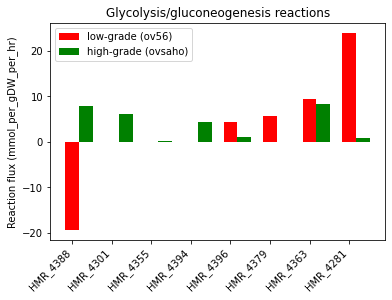

In [153]:
y1 = gg_df['ov56_flux']
y2 = gg_df['ovsaho_flux']

N=8
ind = np.arange(N) 
width = 0.35      
plt.bar(ind, y1, width, label='low-grade (ov56)', color='r')
plt.bar(ind + width, y2, width,
    label='high-grade (ovsaho)', color='g')

reaction_ids = gg_df['reactions']
plt.xticks(ind, reaction_ids)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Reaction flux (mmol_per_gDW_per_hr)')
plt.title('Glycolysis/gluconeogenesis reactions')

plt.legend(loc='best')
plt.savefig('gg.png', dpi = 1200, bbox_inches='tight')
plt.show()

In [154]:
gg_equations = []
gg_compartments = []
for r in gg_df['reactions']:
    gg_equations.append(model.reactions.get_by_id(r).name)
    gg_compartments.append(model.reactions.get_by_id(r).compartments)

In [160]:
model.reactions.get_by_id('HMR_4281')

Reaction identifier,HMR_4281
Name,-1.0 H+ + -1.0 NADH + -1.0 pyruvate <--> 1.0 L-lactate + 1.0 NAD+
Memory address,0x13bff0670
Stoichiometry,m02039p + m02553p + m02819p <=> m02403p + m02552p H+ + NADH + pyruvate <=> L-lactate + NAD+
GPR,ENSG00000111716 or ENSG00000134333 or ENSG00000151116 or ENSG00000166796 or ENSG00000166800 or...
Lower bound,-23.955037918000002
Upper bound,23.955037918000002


In [162]:
gg_details = pd.DataFrame(columns = ['reactions', 'names', 'compartments'])
gg_details['reactions'] = gg_ids_2[:8]
gg_details['names'] = gg_equations
gg_details['compartments'] = gg_compartments
gg_details.to_csv('gg_details.csv')

In [163]:
ppp_df

,reactions,ov56_flux,ovsaho_flux
2,HMR_4404,0.000000,-0.293882
4,HMR_4501,0.000000,-0.293882
5,HMR_4568,0.000000,0.293882
3,HMR_4476,0.667340,0.000000
1,HMR_4354,4.088058,-0.062657
0,HMR_4052,6.436490,0.818989


In [164]:
combined_reactions = []
combined_ov56 = []
combined_ovsaho = []
for r in ppp_df['reactions']:
    combined_reactions.append(r)
for r in ppp_df['ov56_flux']:
    combined_ov56.append(r)
for r in ppp_df['ovsaho_flux']:
    combined_ovsaho.append(r)
for r in ox_phos_df['reactions']:
    combined_reactions.append(r)
for r in ox_phos_df['ov56_flux']:
    combined_ov56.append(r)
for r in ox_phos_df['ovsaho_flux']:
    combined_ovsaho.append(r)

combined_df = pd.DataFrame(columns = ['reactions', 'ov56_flux', 'ovsaho_flux'])
combined_df['reactions'] = combined_reactions
combined_df['ov56_flux'] = combined_ov56
combined_df['ovsaho_flux'] = combined_ovsaho
combined_df = combined_df.sort_values(by=['ov56_flux'])
combined_df

,reactions,ov56_flux,ovsaho_flux
6,HMR_6911,-12.434204,0.000000
0,HMR_4404,0.000000,-0.293882
1,HMR_4501,0.000000,-0.293882
2,HMR_4568,0.000000,0.293882
3,HMR_4476,0.667340,0.000000
7,HMR_6912,0.895151,0.000000
8,HMR_6916,3.343976,4.884118
4,HMR_4354,4.088058,-0.062657
5,HMR_4052,6.436490,0.818989


In [165]:
combined_df = combined_df.drop([0,1])
combined_df

,reactions,ov56_flux,ovsaho_flux
6,HMR_6911,-12.434204,0.000000
2,HMR_4568,0.000000,0.293882
3,HMR_4476,0.667340,0.000000
7,HMR_6912,0.895151,0.000000
8,HMR_6916,3.343976,4.884118
4,HMR_4354,4.088058,-0.062657
5,HMR_4052,6.436490,0.818989


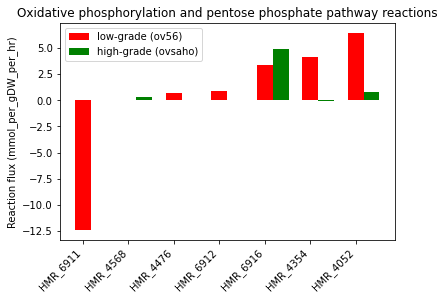

In [171]:
y1 = combined_df['ov56_flux']
y2 = combined_df['ovsaho_flux']

N=7
ind = np.arange(N) 
width = 0.35      
plt.bar(ind, y1, width, label='low-grade (ov56)', color='r')
plt.bar(ind + width, y2, width,
    label='high-grade (ovsaho)', color='g')

reaction_ids = combined_df['reactions']
plt.xticks(ind, reaction_ids)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Reaction flux (mmol_per_gDW_per_hr)')
plt.title('Oxidative phosphorylation and pentose phosphate pathway reactions')

plt.legend(loc='best')
plt.savefig('ox_phos_and_ppp.png', dpi = 1200, bbox_inches='tight')
plt.show()

In [172]:
model.reactions.get_by_id('HMR_6916')

Reaction identifier,HMR_6916
Name,-1.0 ADP + -1.0 Pi --> 2.0 H+ + 1.0 ATP + 1.0 H2O
Memory address,0x13cd44310
Stoichiometry,m01285m + 3.0 m02039i + m02751m --> m01371m + 2.0 m02039m + m02040m ADP + 3.0 H+ + Pi --> ATP + 2.0 H+ + H2O
GPR,ENSG00000099624 and ENSG00000110955 and ENSG00000116459 and ENSG00000124172 and ENSG00000135390...
Lower bound,0
Upper bound,6.289834465


In [168]:
len(tca_df['ov56_flux'])

19

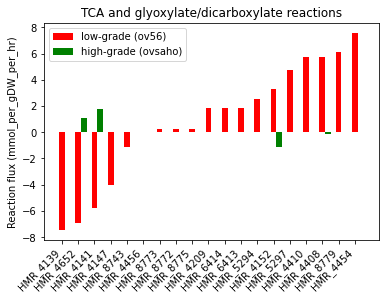

In [169]:
y1 = tca_df['ov56_flux']
y2 = tca_df['ovsaho_flux']

N=19
ind = np.arange(N) 
width = 0.35      
plt.bar(ind, y1, width, label='low-grade (ov56)', color='r')
plt.bar(ind + width, y2, width,
    label='high-grade (ovsaho)', color='g')

reaction_ids = tca_df['reactions']
plt.xticks(ind, reaction_ids)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Reaction flux (mmol_per_gDW_per_hr)')
plt.title('TCA and glyoxylate/dicarboxylate reactions')

plt.legend(loc='best')
plt.savefig('tca.png', dpi = 1200, bbox_inches='tight')
plt.show()